In [1]:
import numpy as np
import os 
import pandas as pd 
import random 
import shutil
import sys  
import matplotlib.pyplot as plt
import logging
from pprint import pprint 
from datetime import datetime

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logging.logThreads = False
logging.logProcesses = False

chapters = ['chapter01', 'chapter02', 'chapter03']
sys.path.append(os.path.abspath(f'../code/'))

for chapter in chapters:
    base_path = os.path.abspath(f'../code/{chapter}/')
    sys.path.append(base_path)

import tic_tac_toe as c1 
import ten_armed_testbed as c2
import grid_world as c3
import chapter04 as c4
import chapter05 as c5
import chapter06 as c6
import chapter07 as c7
import chapter08 as c8
import seaborn as sns

# auto load the changes of referenced codes
%load_ext autoreload
%autoreload 2

In [2]:
# if new methods are created in referenced codes, run the following code.
%reload_ext autoreload

代码来自https://github.com/ShangtongZhang/reinforcement-learning-an-introduction



## Chapter 5

### figure_5_1

100%|███████████████████████████████████████████████████████████████████████| 500000/500000 [00:09<00:00, 50942.51it/s]


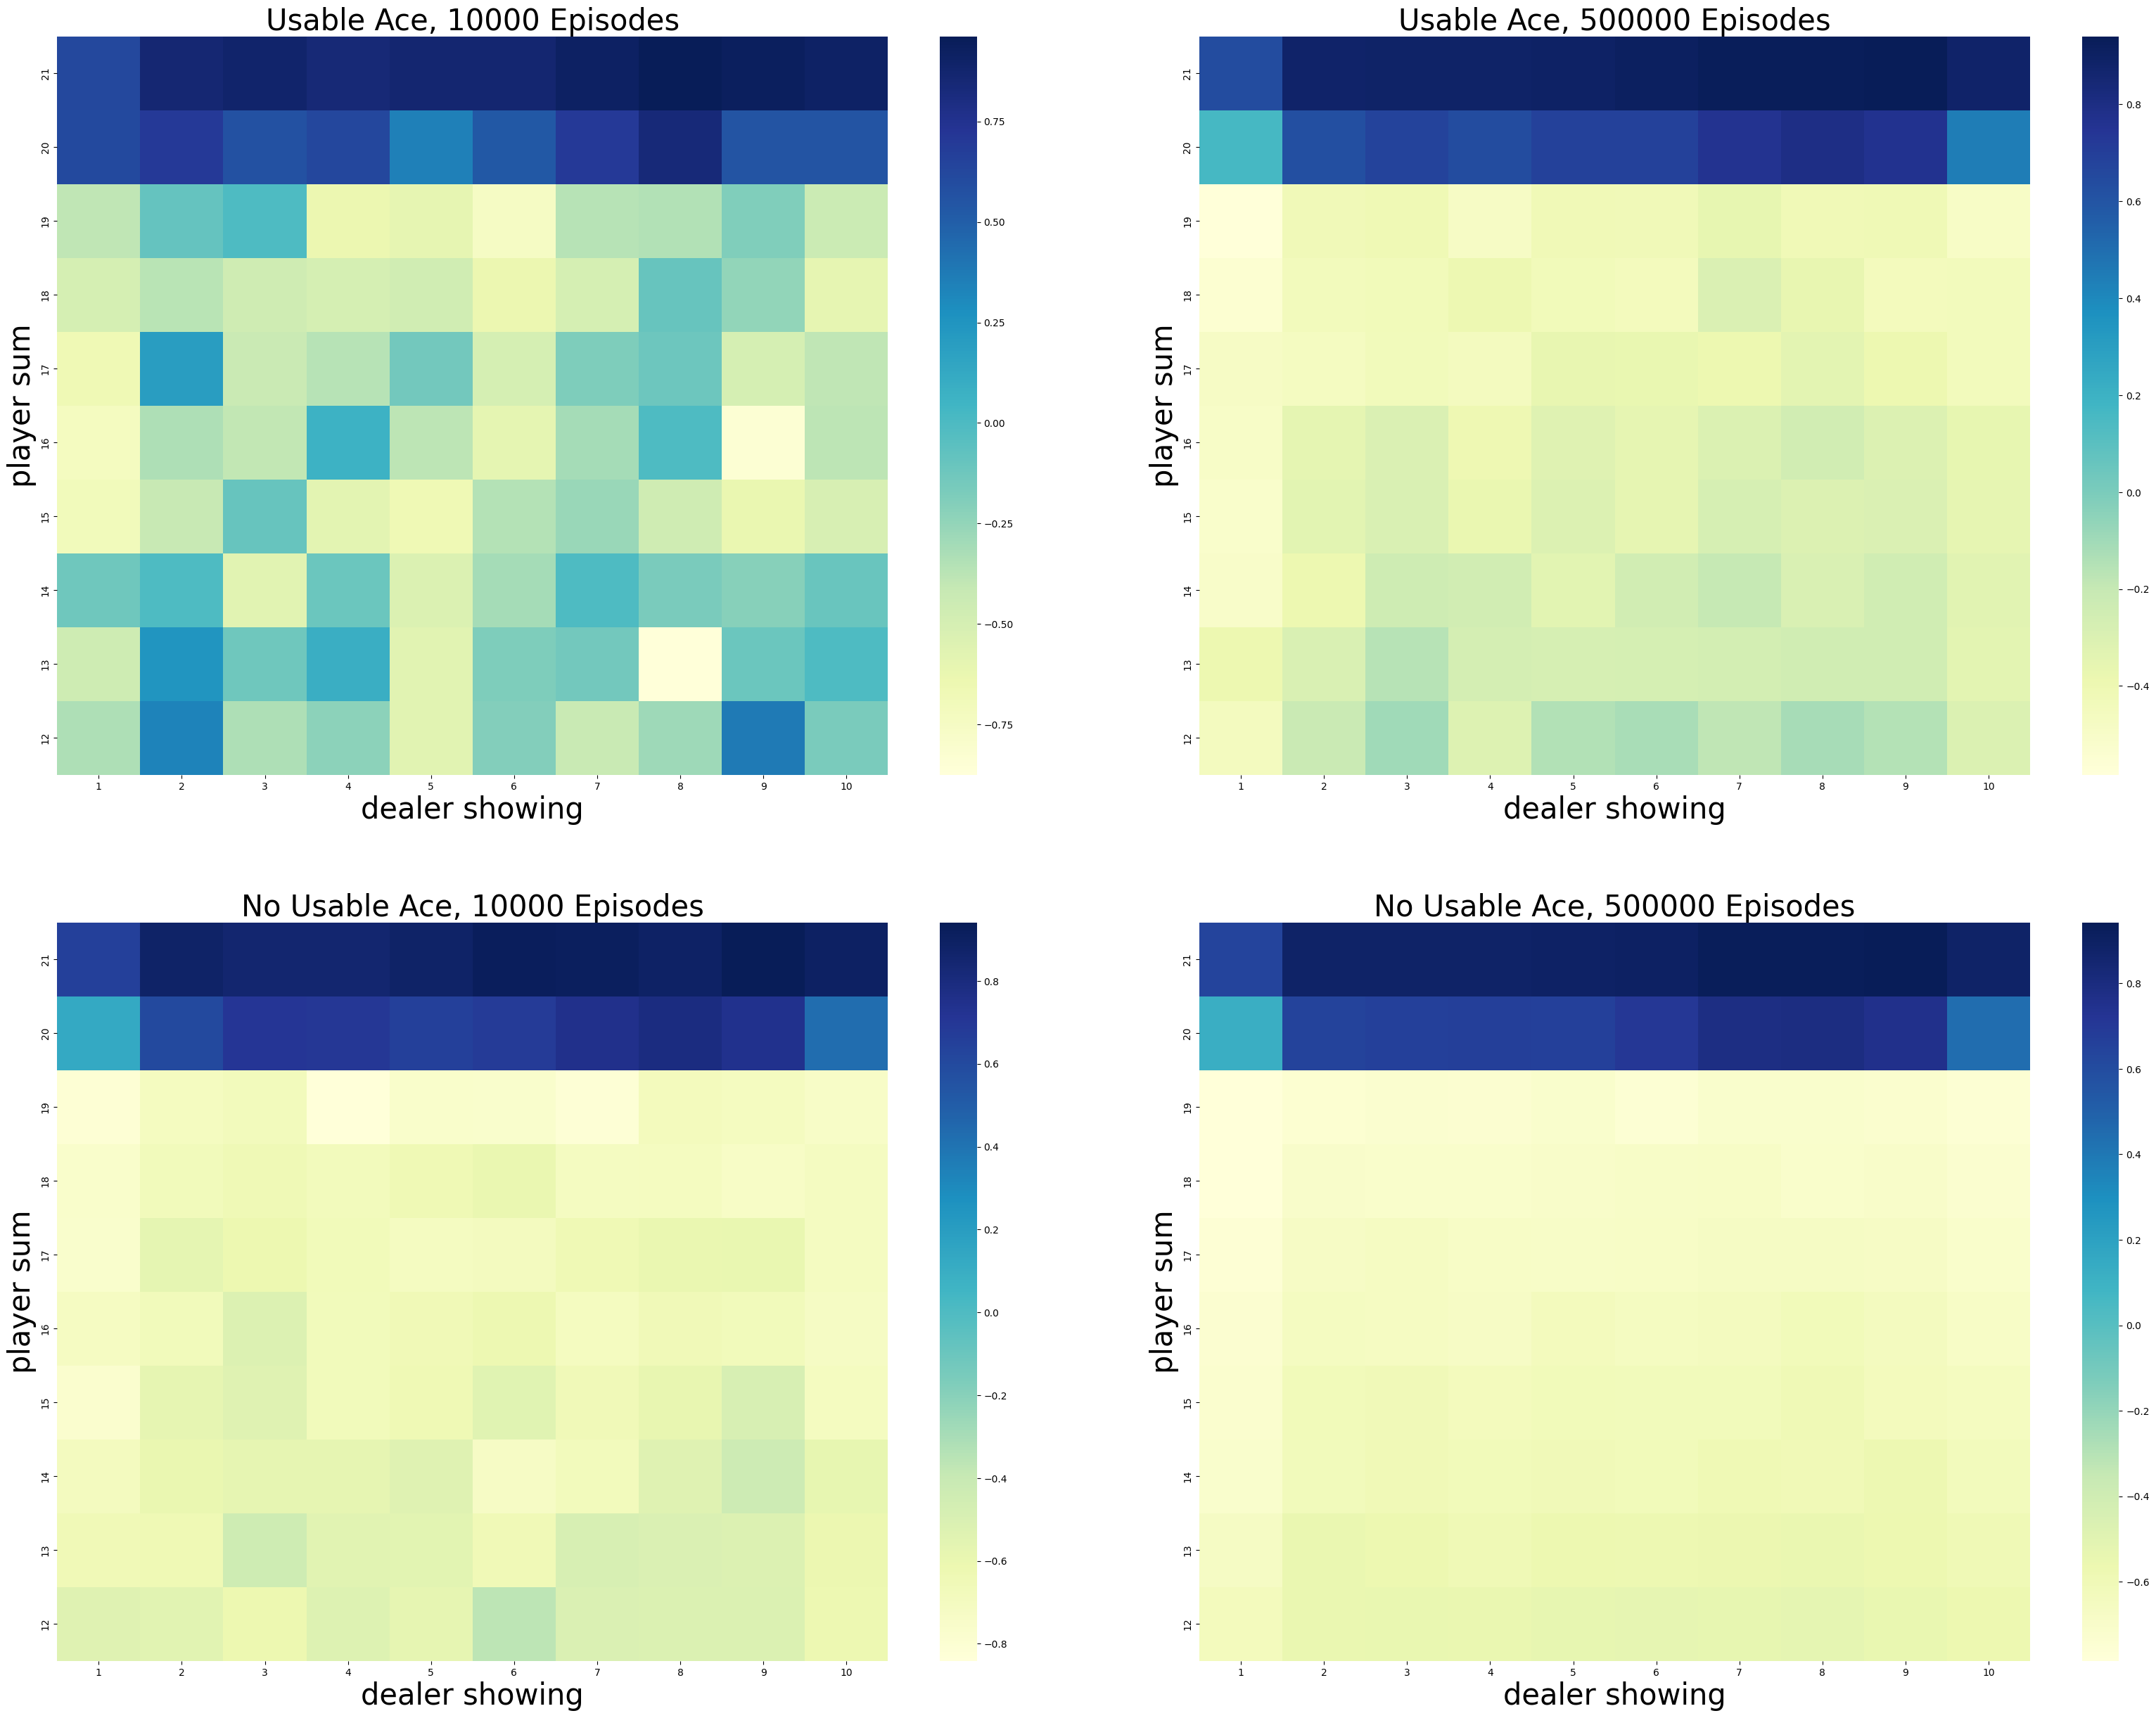

In [5]:
c5.blackjack.figure_5_1(500000)

### figure_5_2

In [14]:
episodes = 500000
state_action_values = c5.blackjack.monte_carlo_es(episodes) 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:48<00:00, 4598.40it/s]


In [19]:
actual_reward, plan_reward, win_rate = c5.blackjack.compute_win_rate(episodes, state_action_values)
print(f'actual_reward: {actual_reward:.3f}\nplan_reward: {plan_reward:.3f}\nwin_rate: {win_rate:.3f}') 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:13<00:00, 6832.33it/s]

actual_reward: -0.047
plan_reward: -0.046
win_rate: 0.477


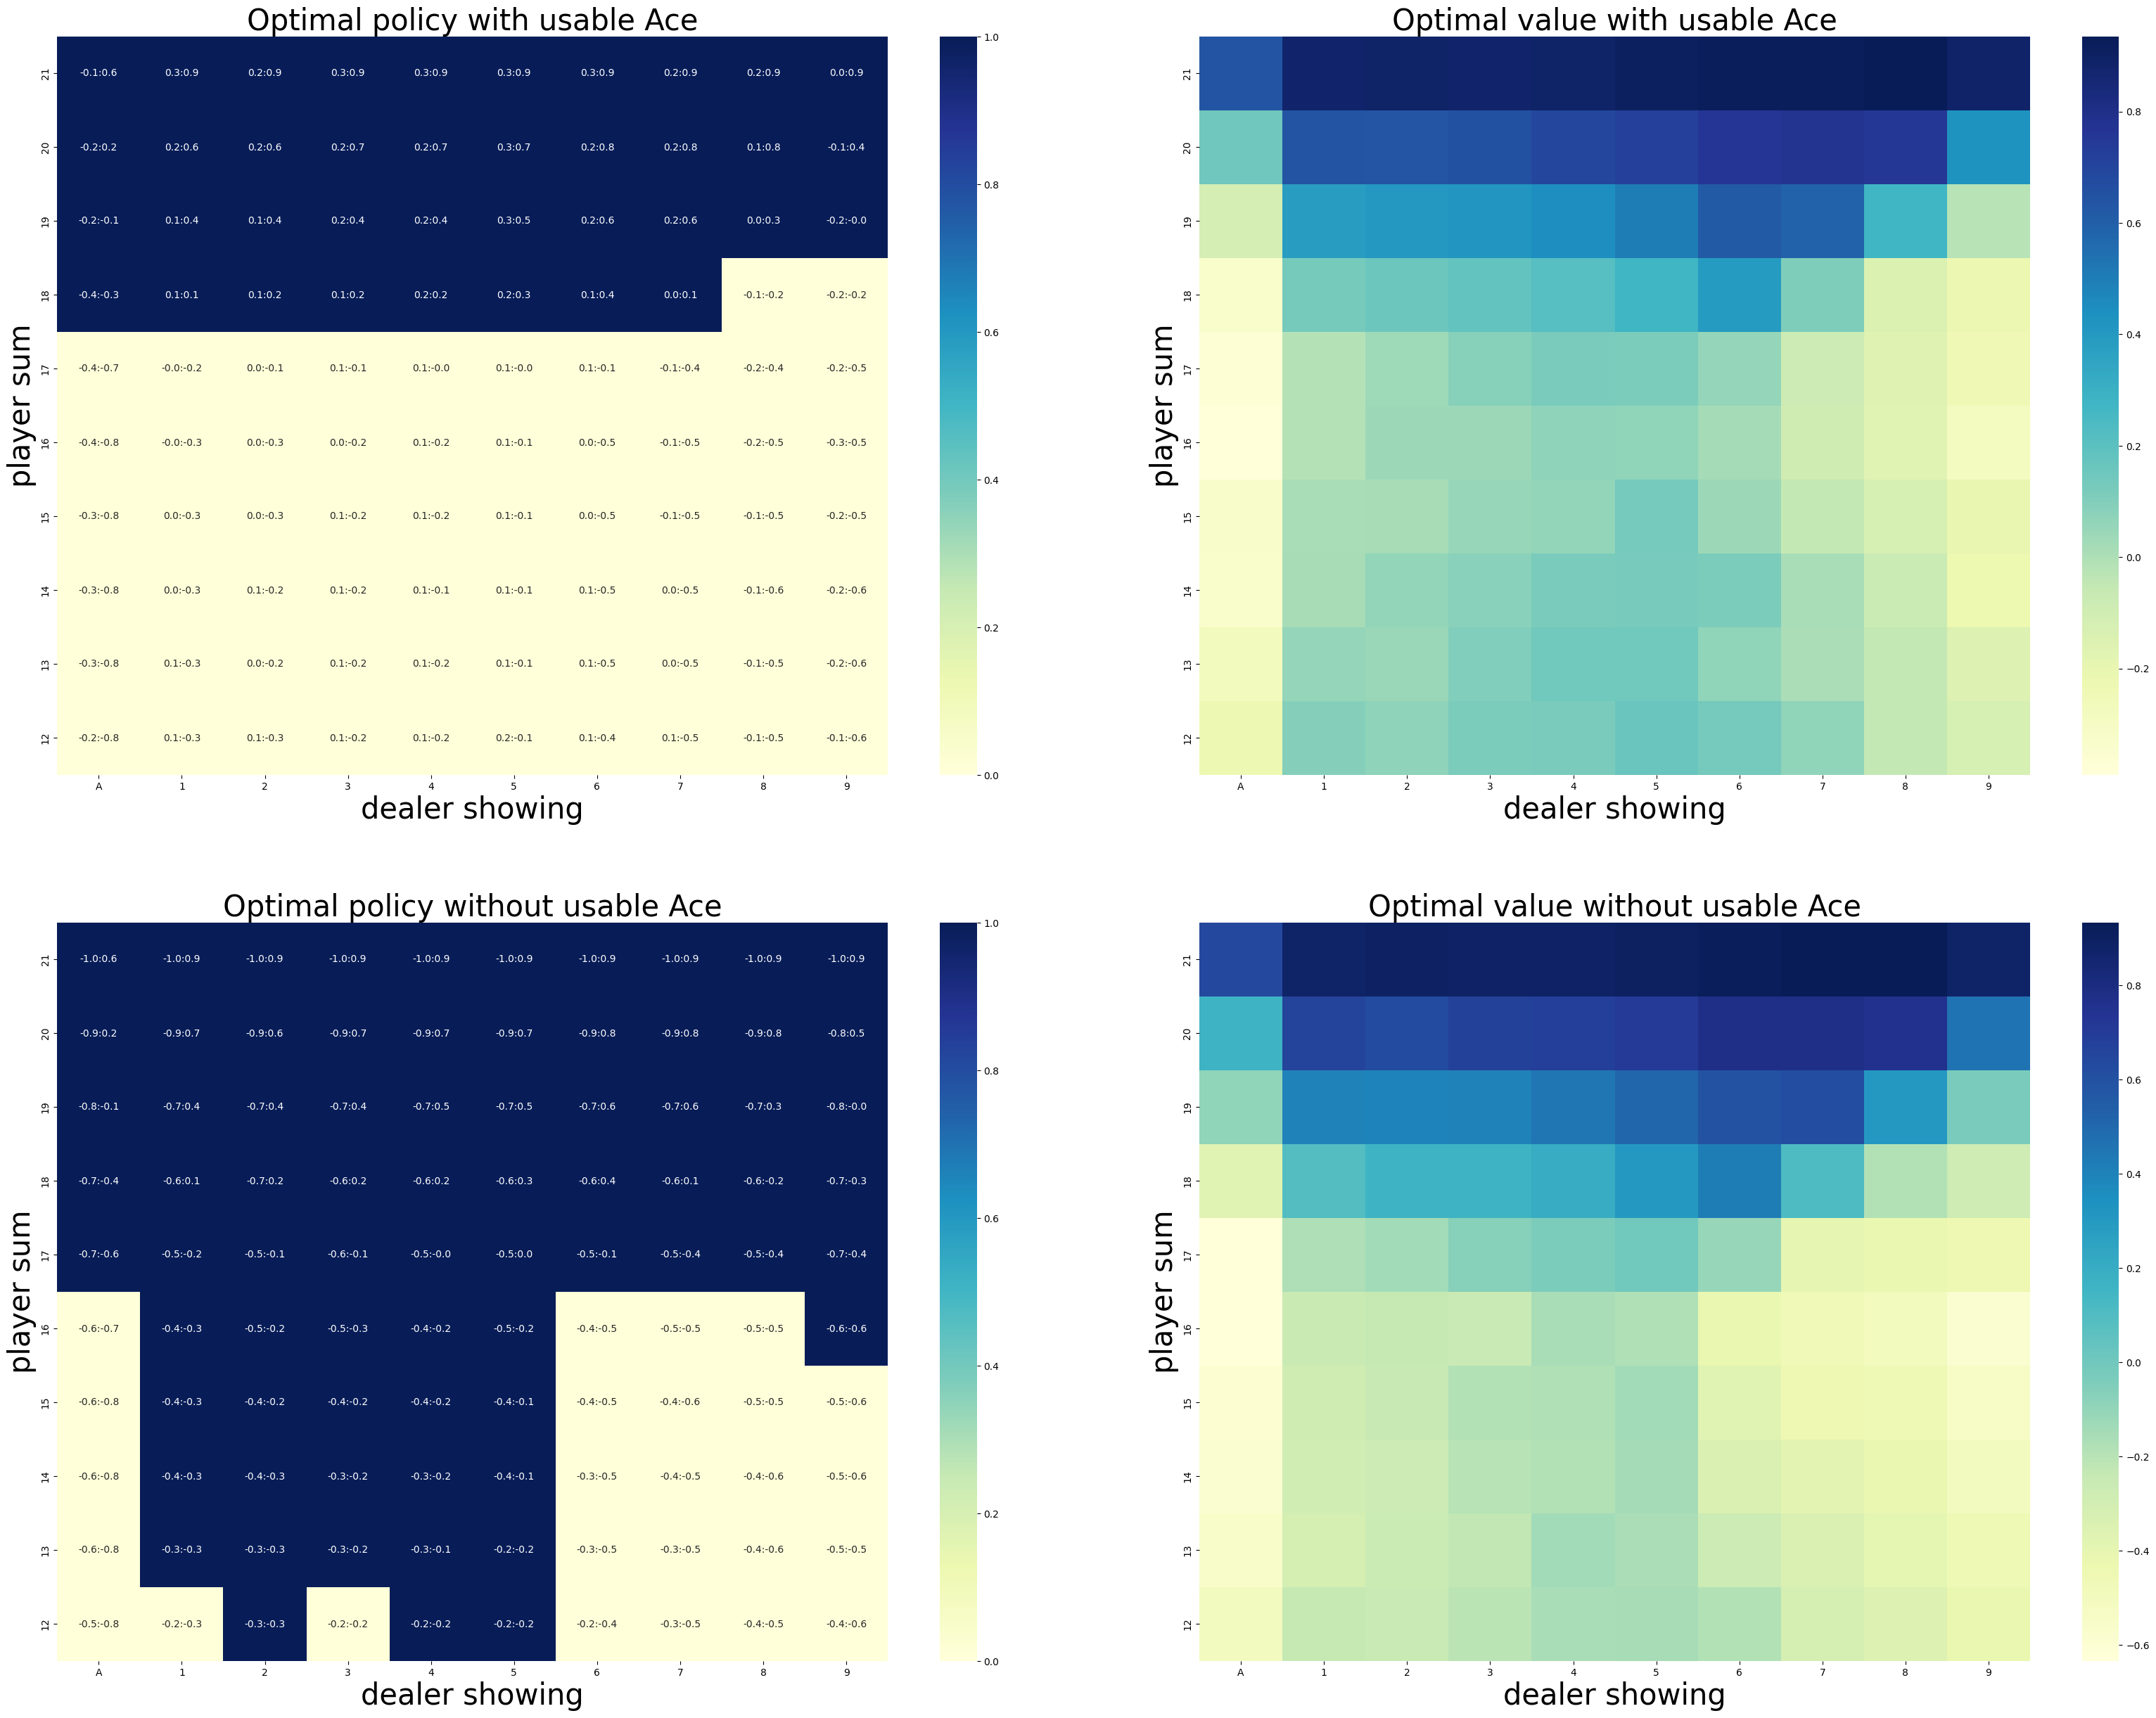

In [18]:
c5.blackjack.figure_5_2(state_action_values)

In [28]:
episodes = 500000
state_action_values = c5.blackjack.monte_carlo_es(episodes) 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:51<00:00, 4504.23it/s]


In [29]:
actual_reward, plan_reward, win_rate = c5.blackjack.compute_win_rate(episodes, state_action_values)
print(f'actual_reward: {actual_reward:.3f}\nplan_reward: {plan_reward:.3f}\nwin_rate: {win_rate:.3f}') 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:13<00:00, 6769.04it/s]

actual_reward: -0.046
plan_reward: -0.041
win_rate: 0.477


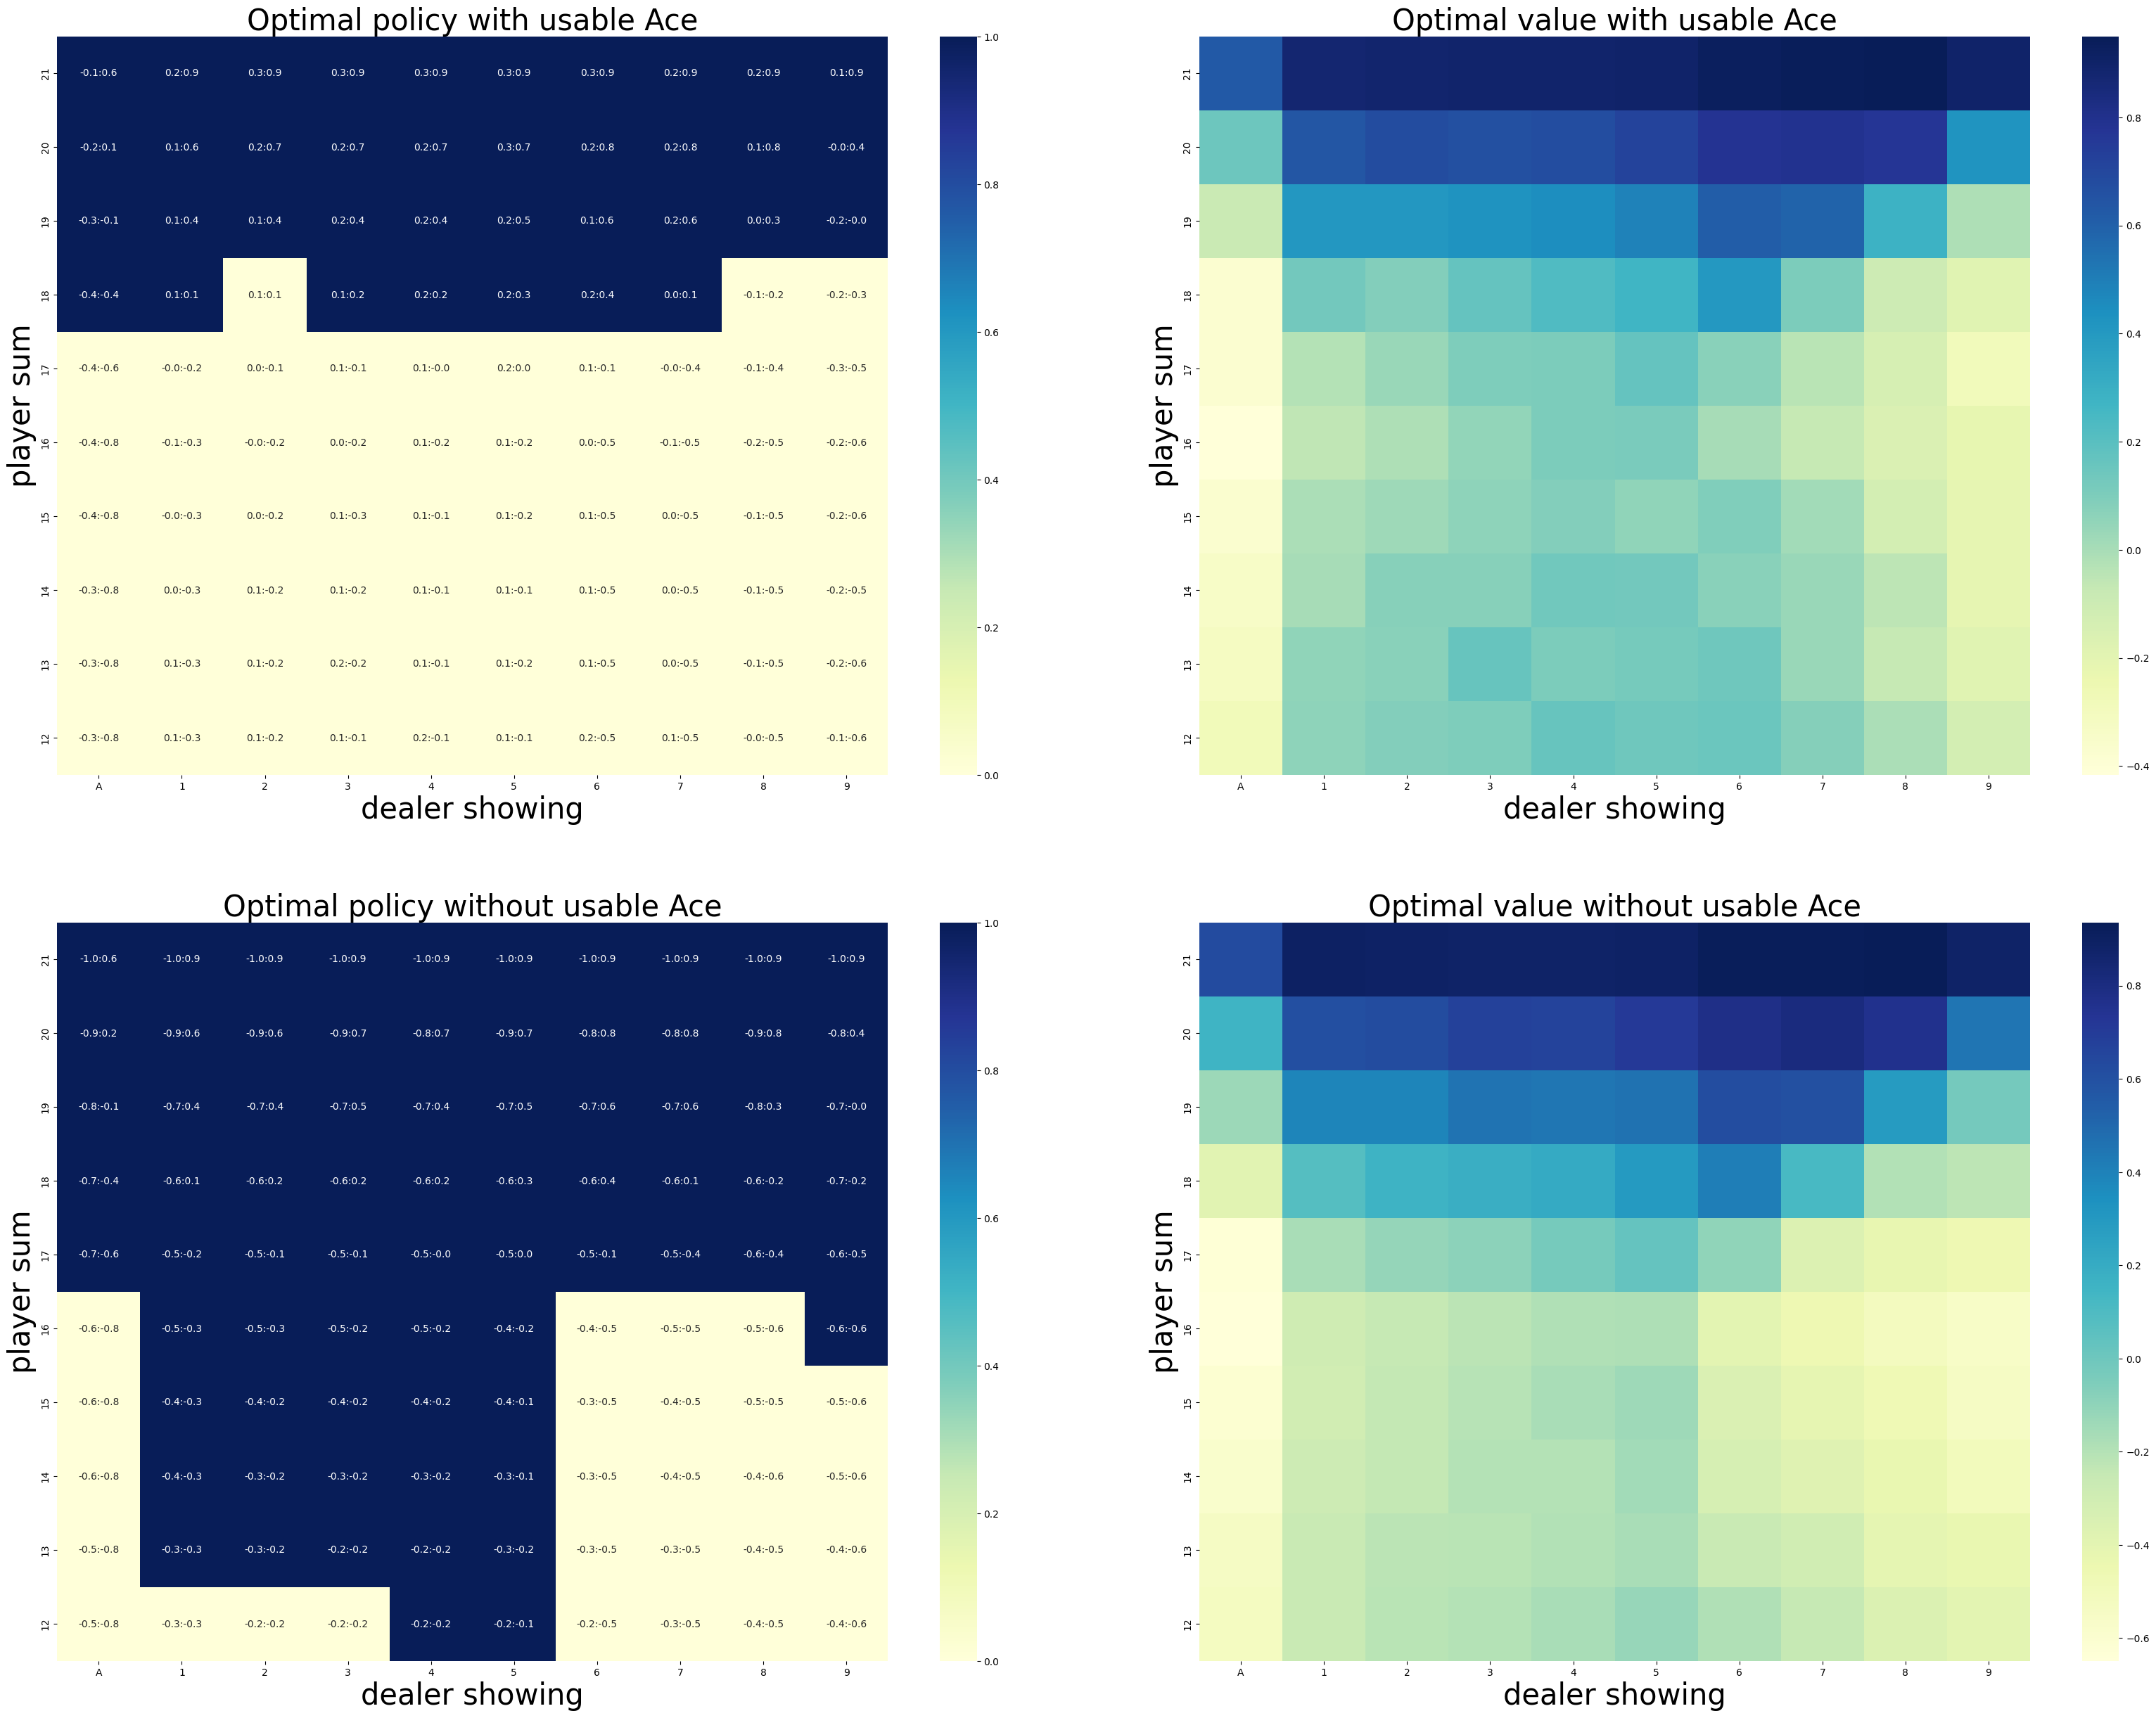

In [30]:
c5.blackjack.figure_5_2(state_action_values)

### figure_5_3

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.92it/s]


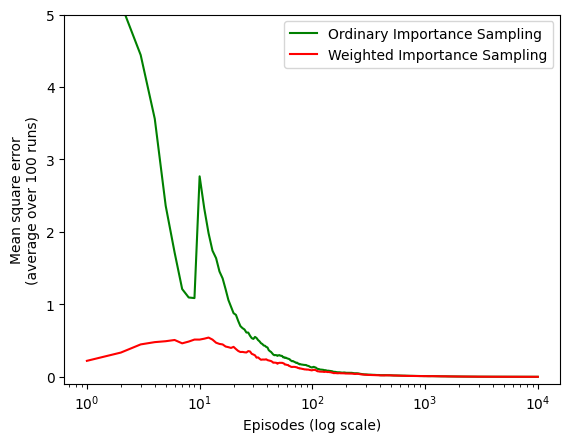

In [23]:
c5.blackjack.figure_5_3()

### figure_5_4

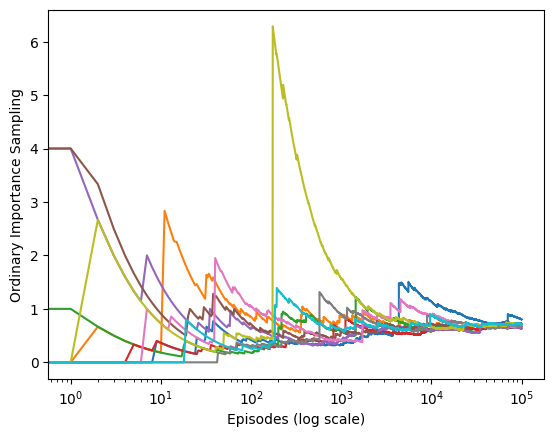

In [25]:
c5.infinite_variance.figure_5_4()

### exercise 5.12

In [8]:
def show_races(races, start_point, ncols = 3):
    nrows = int(len(races) / ncols)
    if len(races) % ncols != 0:
        nrows += 1 
        
    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4 + 4*nrows))
    for k, (episode, race) in enumerate(races.items()):
        i = k // ncols
        j = k % ncols        
        state, player_trajectory = race.play(race.greedy_target_policy_player, 
                                             start_position=start_point)  
        race.show_trajectory(state, player_trajectory, ax=axs[i, j], 
                             title=f'episode:{episode} return: {-len(player_trajectory)}' )

    plt.tight_layout()
    plt.show()

def get_races(race_name, sub_race='latest'):
    racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", race_name + '.csv')
    races = {}
    eipsodes = [1000, 10000, 50000, 250000, 1000000, 2000000][::-1]
    for episode in eipsodes:
        q_path = os.path.join('model', race_name, sub_race, f"{episode}.pickle")
        races[episode] = c5.racetrack.RaceTrack(racetrack_csv, noise=0, gamma=1.0, q_path=q_path)
    return races

def show_best_trajectory(race, ncols = 3):
    nrows = int(len(race.starting_points) / ncols)
    if len(race.starting_points) % ncols != 0:
        nrows += 1 

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4 + 4*nrows))

    for k, start_point in enumerate(race.starting_points):
        i = k // ncols
        j = k % ncols
        state, player_trajectory = race.play(race.greedy_target_policy_player, 
                                             start_position=start_point)  
        race.show_trajectory(state, player_trajectory, ax=axs[i, j], 
                             title=f'start: {start_point} return: {-len(player_trajectory)}' )         
    plt.tight_layout()
    plt.show()

#### default

In [5]:
racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", "figure05-05-left.csv")
race = c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0, reset_random=False)

save_path = os.path.join('model', datetime.now().strftime('%Y%m%d_%H%M%S'))
save_path = os.path.join('model', 'figure05-05-left', 'latest')
race.monte_carlo_off_policy(int(2e6), 
                            save_episodes=[1000, 10000, 50000, 250000, 1000000, 2000000], 
                            save_path=save_path)

100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [28:50<00:00, 1155.62it/s]


In [6]:
racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", "figure05-05-right.csv")
race = c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0, reset_random=False)

save_path = os.path.join('model', datetime.now().strftime('%Y%m%d_%H%M%S'))
save_path = os.path.join('model', 'figure05-05-right', 'latest')
race.monte_carlo_off_policy(int(2e6), 
                            save_episodes=[1000, 10000, 50000, 250000, 1000000, 2000000], 
                            save_path=save_path)

100%|██████████████████████████████████████████████████████████████████████| 2000000/2000000 [18:11<00:00, 1832.13it/s]


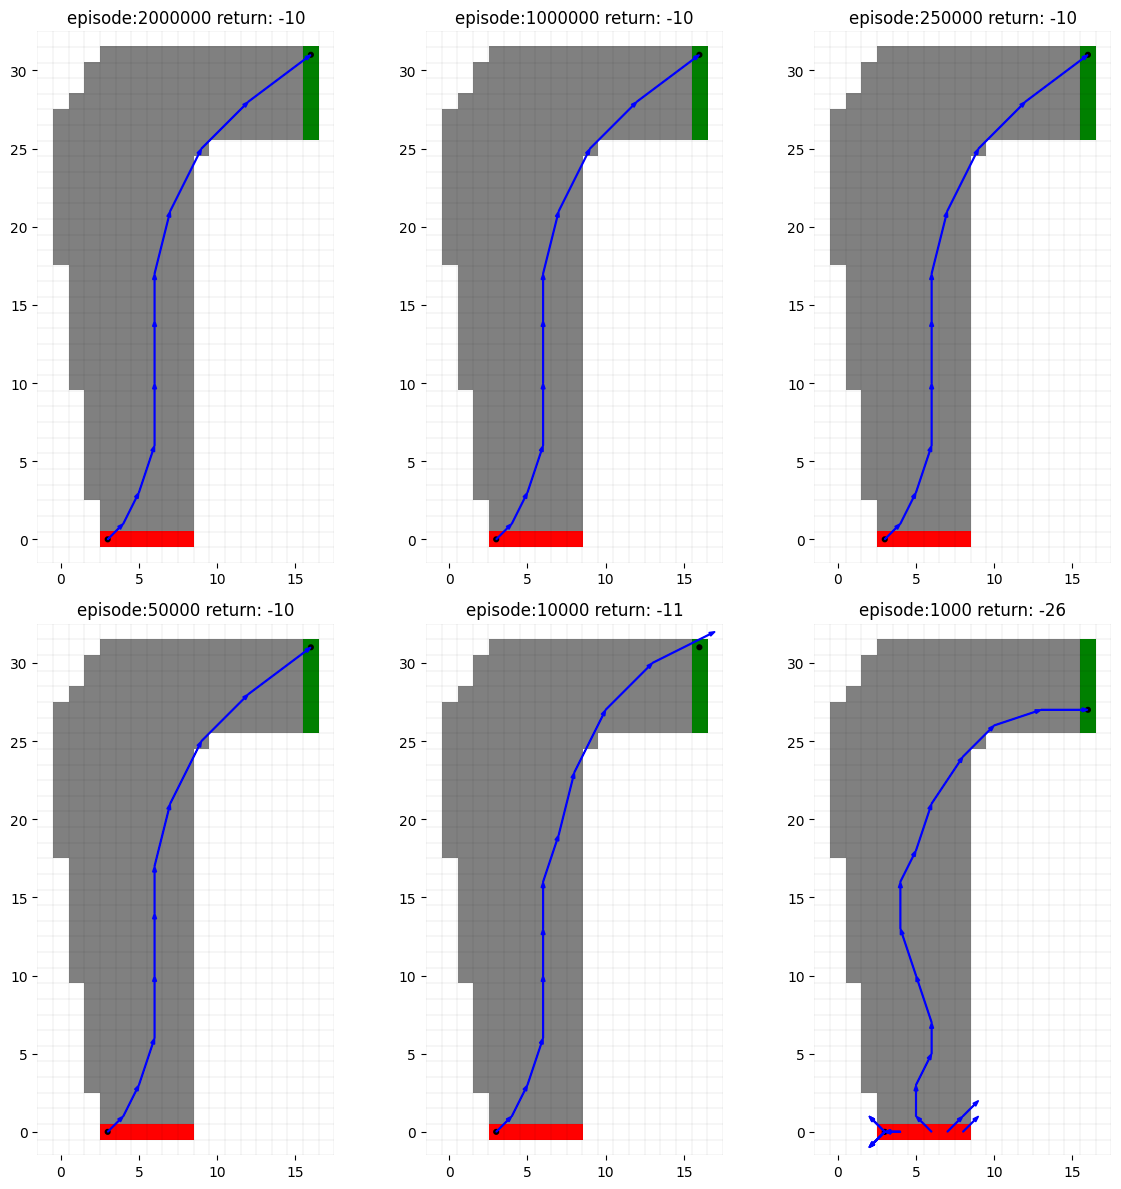

In [13]:
races = get_races('figure05-05-left', sub_race='latest')
show_races(races, (3, 0))

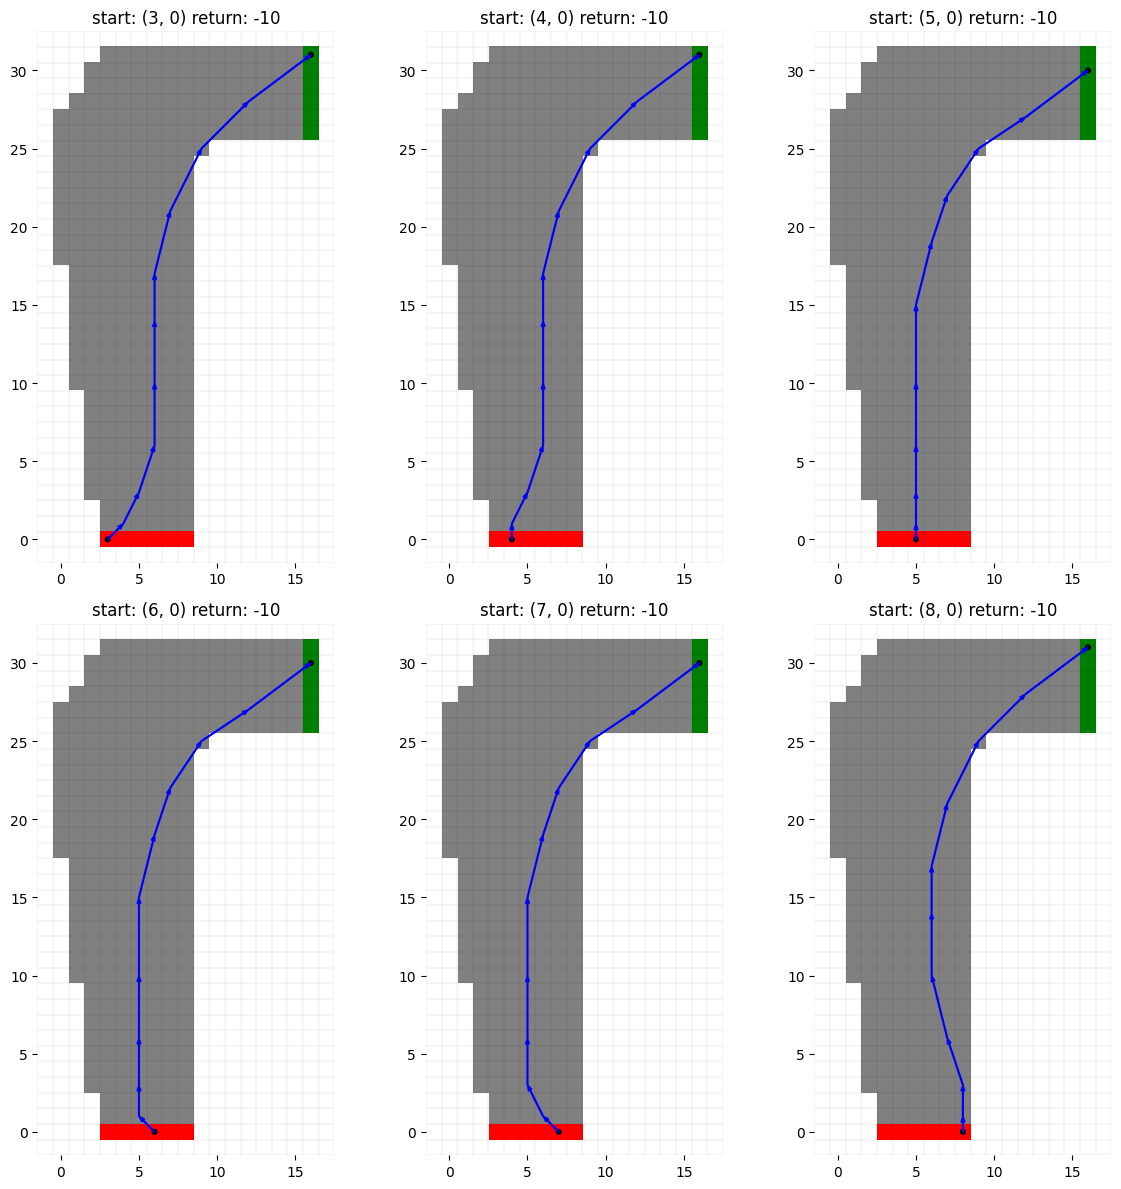

In [10]:
races = get_races('figure05-05-left', sub_race='latest')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

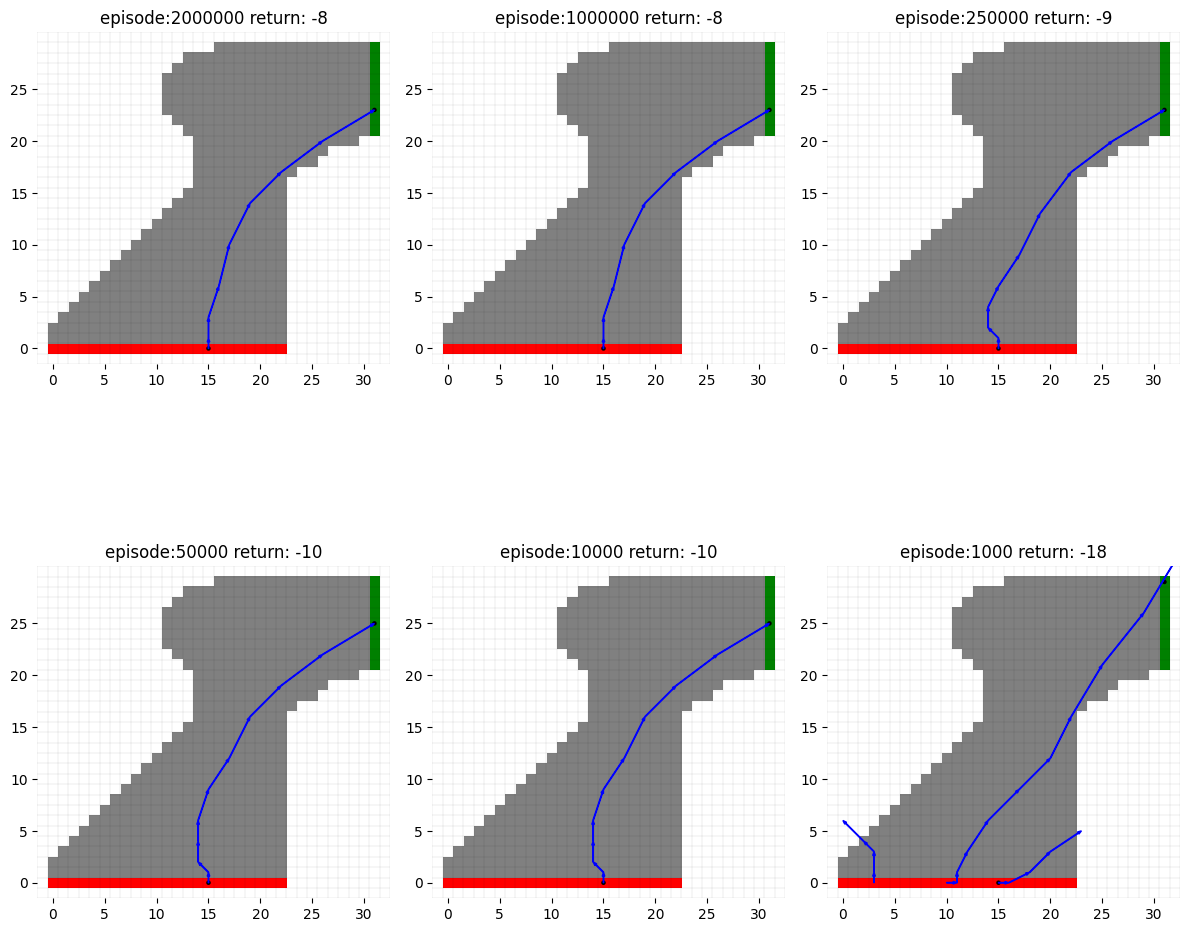

In [11]:
races = get_races('figure05-05-right', sub_race='latest')
show_races(races, (15, 0))

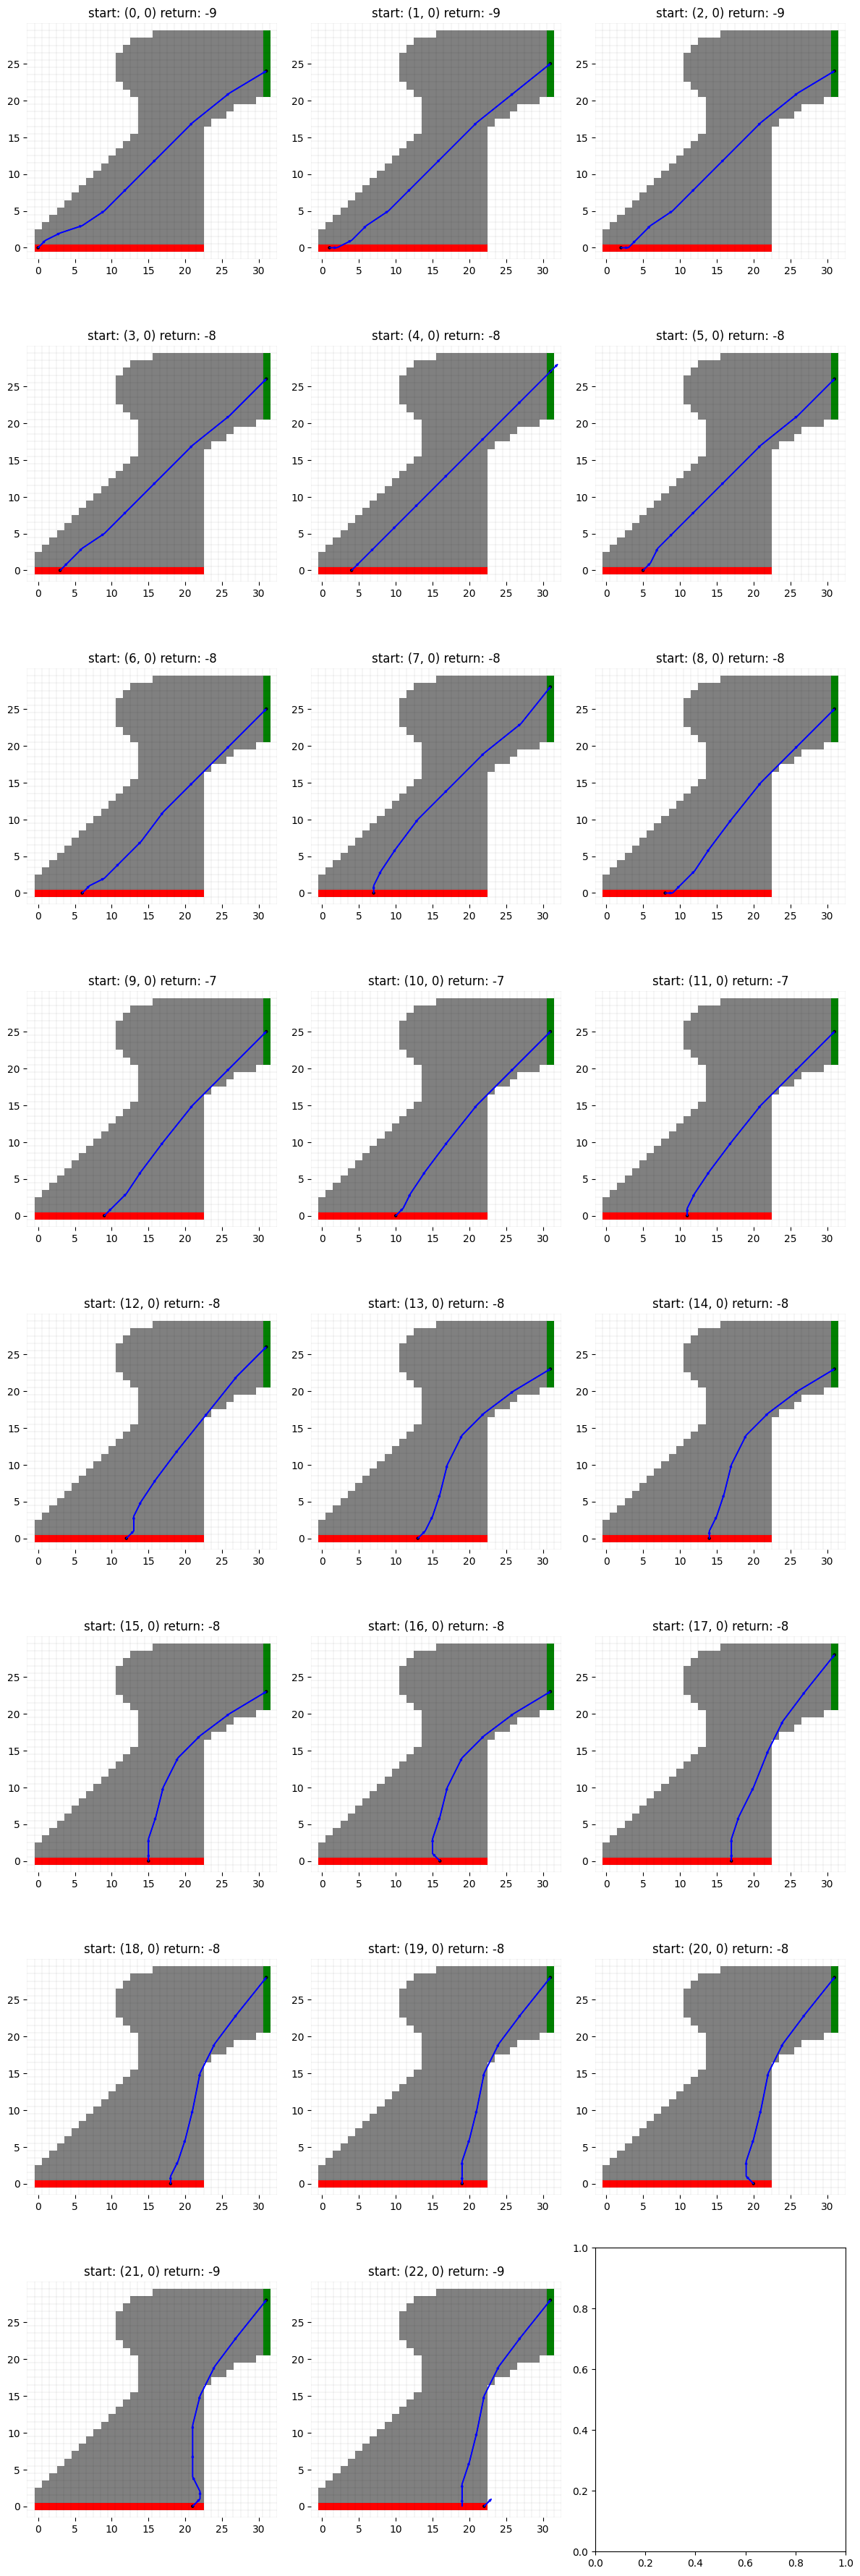

In [12]:
races = get_races('figure05-05-right', sub_race='latest')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

#### acceleration_reward

In [38]:
racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", "figure05-05-left.csv")
race = c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0, 
                              reset_random=False, acceleration_reward=-0.25)

save_path = os.path.join('model', datetime.now().strftime('%Y%m%d_%H%M%S'))
save_path = os.path.join('model', 'figure05-05-left', 'acceleration_reward')
race.monte_carlo_off_policy(int(2e6), 
                            save_episodes=[1000, 10000, 50000, 250000, 1000000, 2000000], 
                            save_path=save_path)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [1:24:13<00:00, 395.75it/s]


In [40]:
racetrack_csv = os.path.join("..", "code", "chapter05", "track_data", "figure05-05-right.csv")
race = c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0, 
                              reset_random=False, acceleration_reward=-0.25)

save_path = os.path.join('model', datetime.now().strftime('%Y%m%d_%H%M%S'))
save_path = os.path.join('model', 'figure05-05-right', 'acceleration_reward')
race.monte_carlo_off_policy(int(2e6), 
                            save_episodes=[1000, 10000, 50000, 250000, 1000000, 2000000], 
                            save_path=save_path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [46:57<00:00, 709.89it/s]


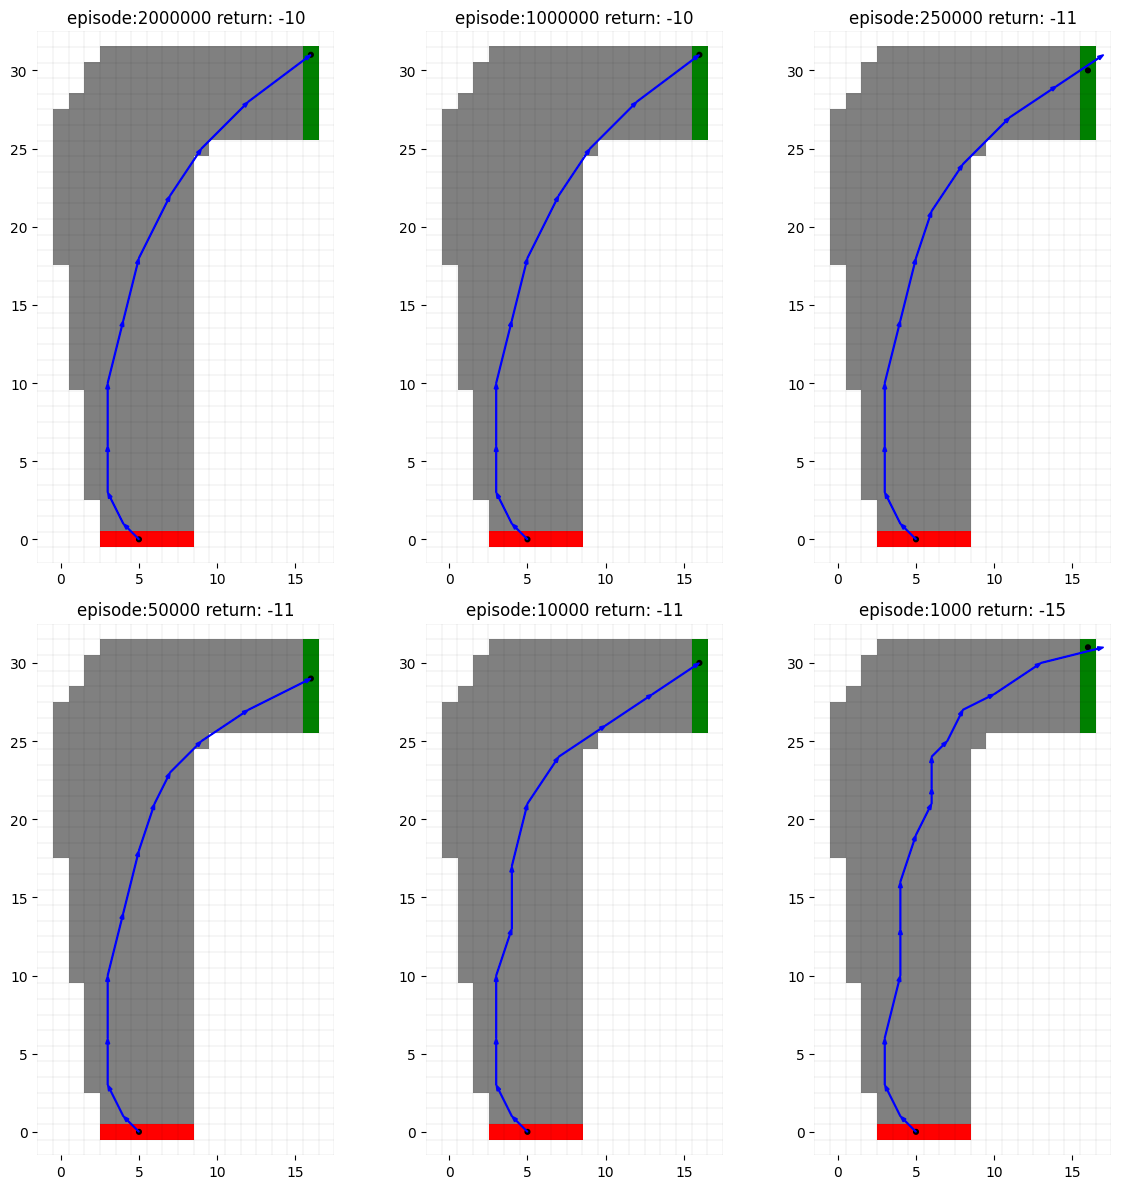

In [45]:
races = get_races('figure05-05-left', sub_race='acceleration_reward') 
show_races(races, (5, 0)) 

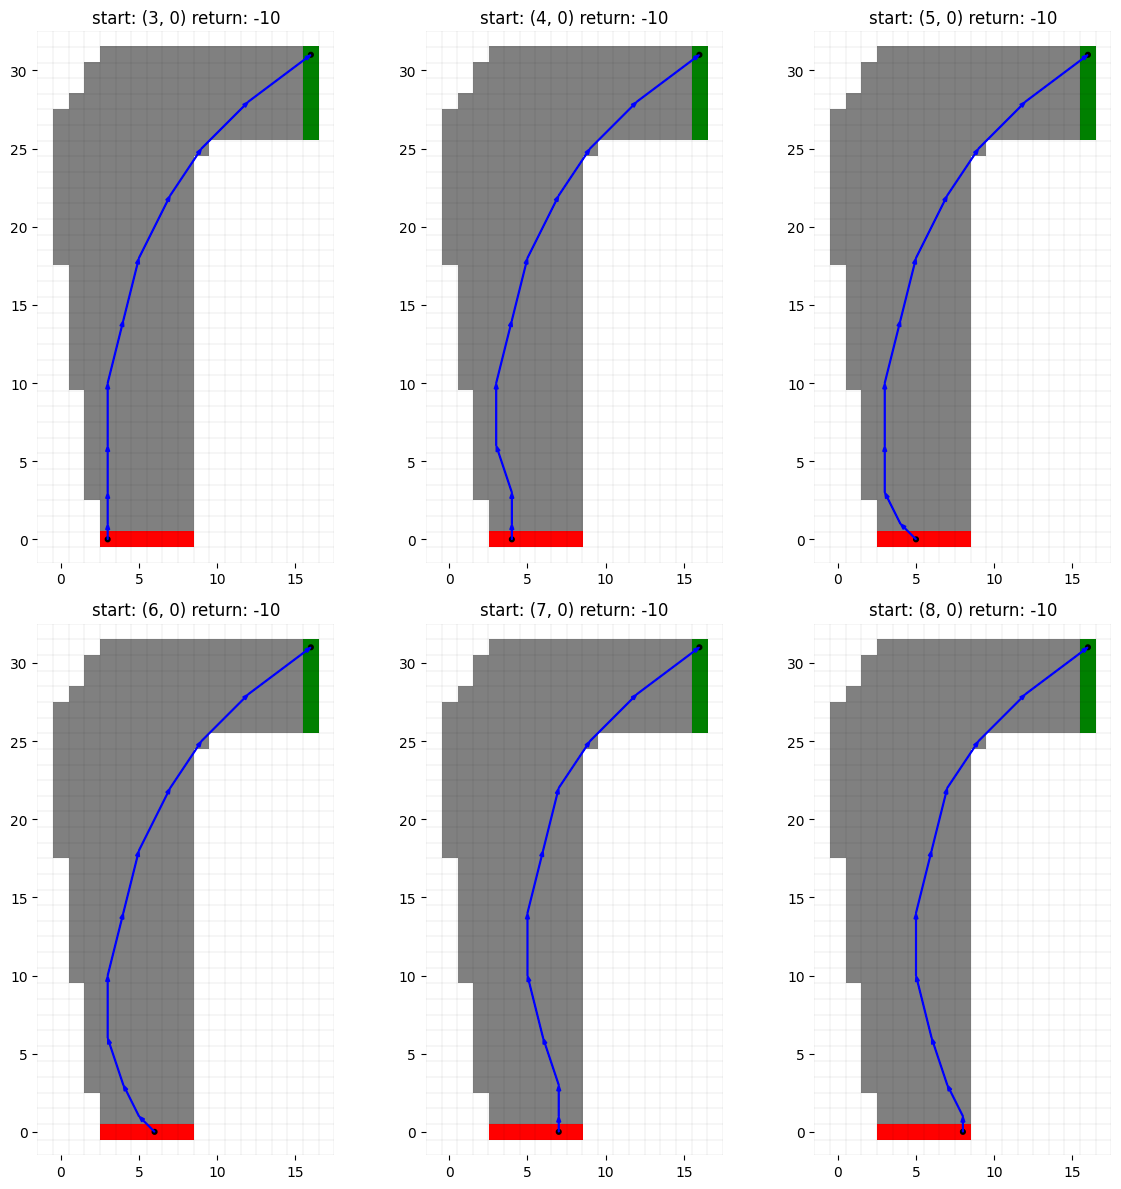

In [42]:
races = get_races('figure05-05-left', sub_race='acceleration_reward')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

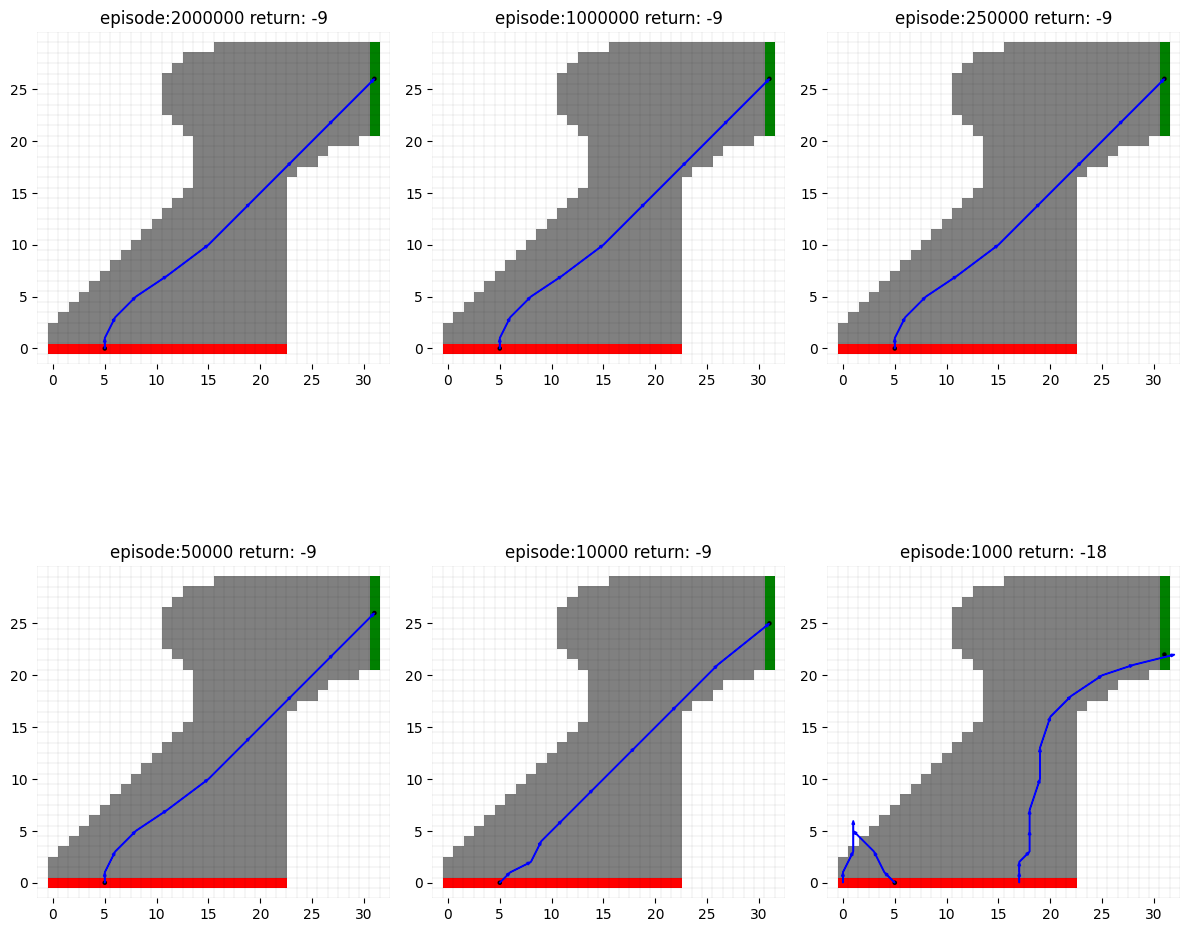

In [43]:
races = get_races('figure05-05-right', sub_race='acceleration_reward') 
show_races(races, (5, 0)) 

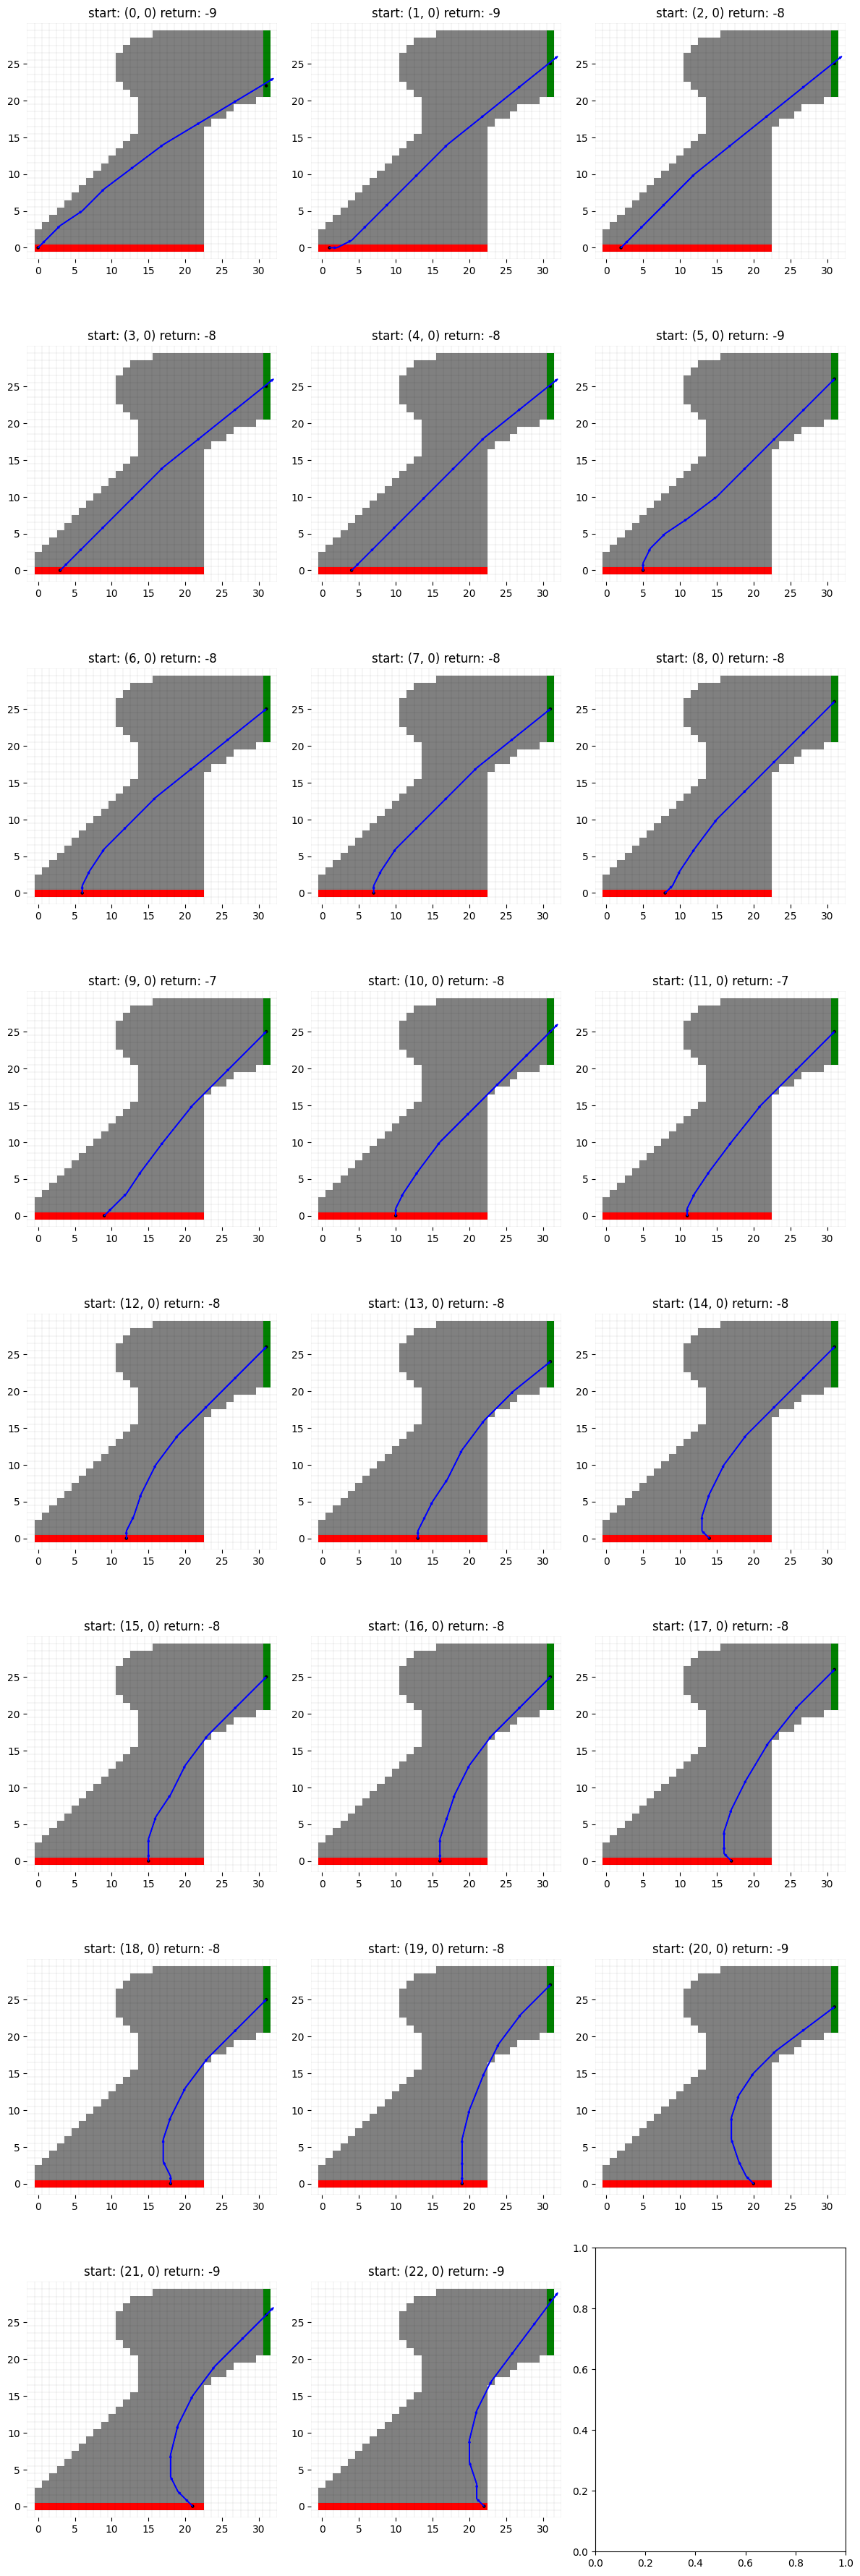

In [44]:
races = get_races('figure05-05-right', sub_race='acceleration_reward')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

#### unit test

In [63]:
import unittest 

suite1 = unittest.TestLoader().loadTestsFromTestCase(c5.test_racetrack.TestRaceTrack)
suite = unittest.TestSuite([suite1])
unittest.TextTestRunner(verbosity=2).run(suite)

test_get_actions (chapter05.test_racetrack.TestRaceTrack) ... ok
test_is_over_boundary (chapter05.test_racetrack.TestRaceTrack) ... ok
test_play (chapter05.test_racetrack.TestRaceTrack) ... ok
test_run (chapter05.test_racetrack.TestRaceTrack) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.013s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [111]:

print(race.racetrack, race.racetrack.shape) 

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 

In [40]:
len(race.state_actions), race.use_state_actions_count   

(196, 332)

## Chapter 6

### example_6.2

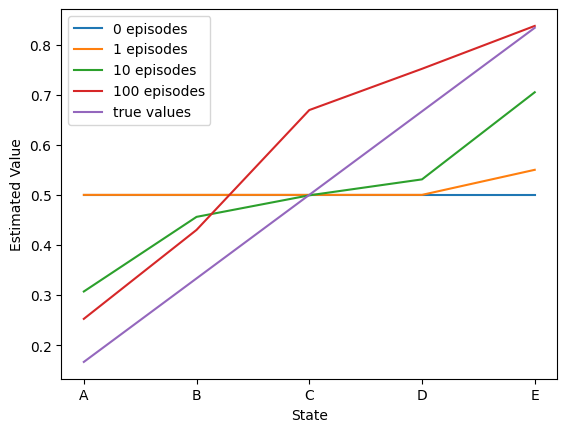

array([0.        , 0.2525813 , 0.45163355, 0.65593362, 0.77265787,
       0.84085733, 1.        ])

In [29]:
c6.random_walk.compute_state_value() 

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 399.46it/s]


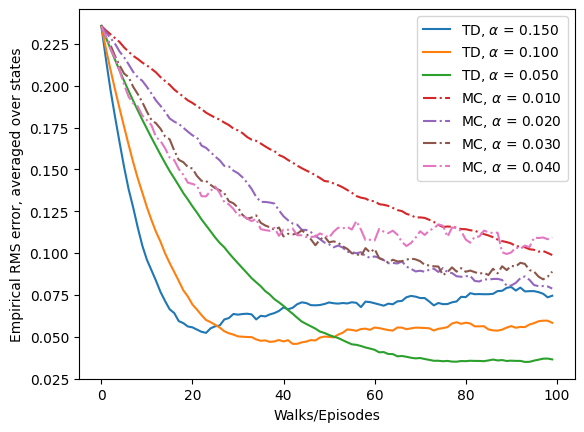

In [30]:
c6.random_walk.rms_error() 

### exercise_6.4

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 164.96it/s]


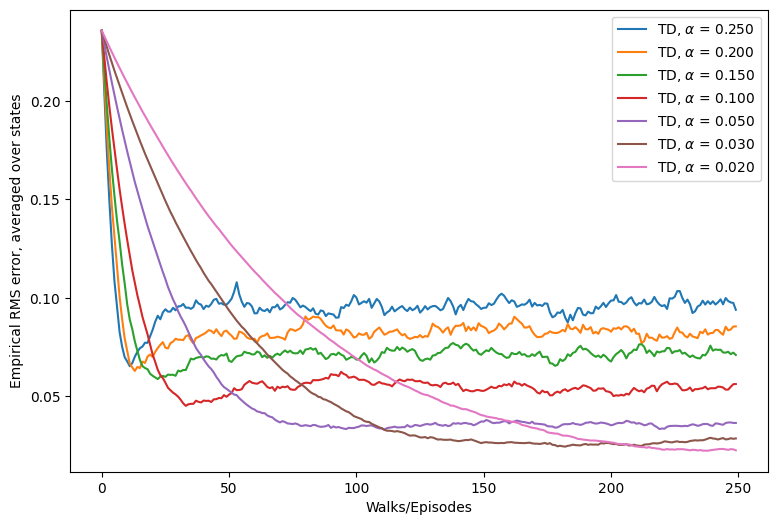

In [34]:
td_alphas = [0.25, 0.2, 0.15, 0.1, 0.05, 0.03, 0.02]
mc_alphas = []
c6.random_walk.rms_error(td_alphas=td_alphas, mc_alphas=mc_alphas, episodes=250, figsize=(9, 6)) 

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 135.93it/s]


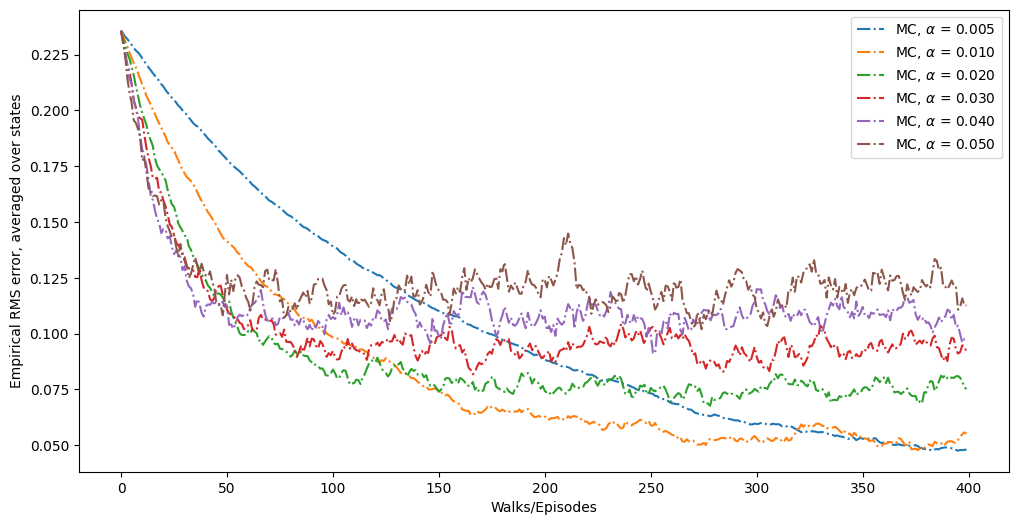

In [37]:
td_alphas = []
mc_alphas = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
c6.random_walk.rms_error(td_alphas=td_alphas, mc_alphas=mc_alphas, episodes=400, figsize=(12, 6)) 

### figure_6_2

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.72it/s]


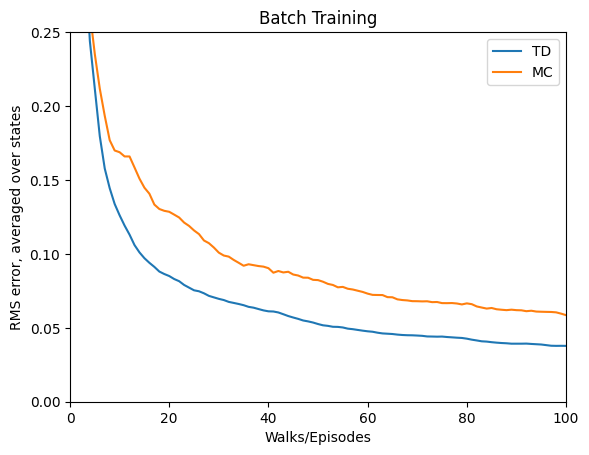

In [104]:
c6.random_walk.figure_6_2()

### example 6_5

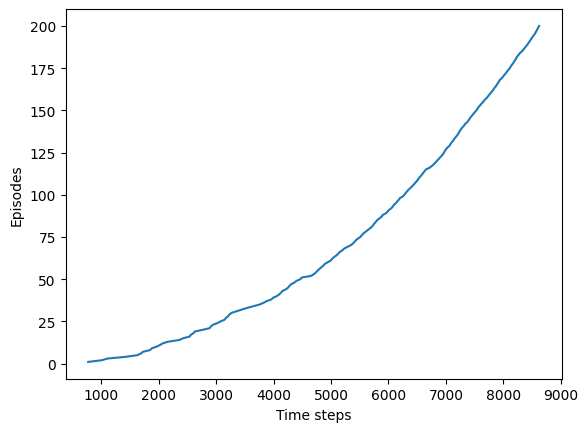

21.8

In [401]:
c6.windy_grid_world.WindyGridWorld().example_6_5(episodes=200) 

average_step:15.0


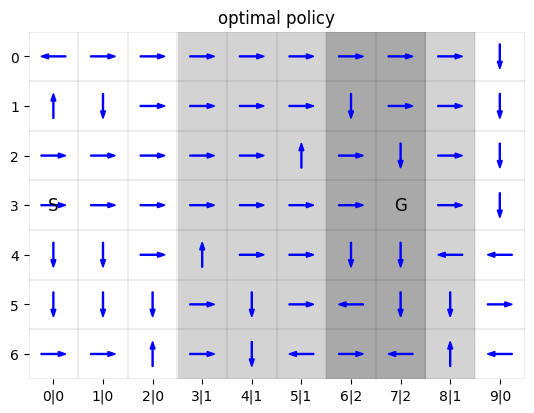

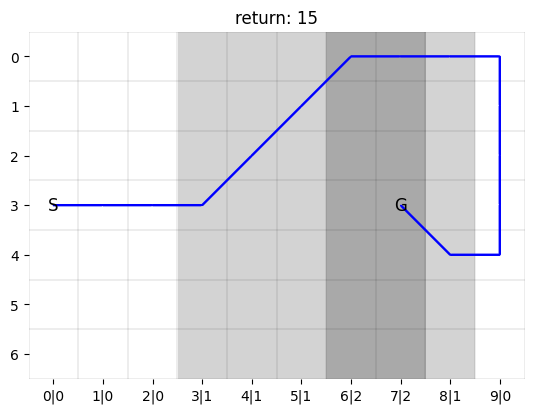

In [413]:
world = c6.windy_grid_world.WindyGridWorld()
steps = world.train(1000) 
print(f'average_step:{world.average_step()}')
world.show_optimal_policy()

trajectory = world.get_trajectory((3, 0))  ## 某些状态，可能会进入无限循环的情况下。
# print(f'trajectory={trajectory}')
world.show_trajectory(trajectory) 

average_step:12.0


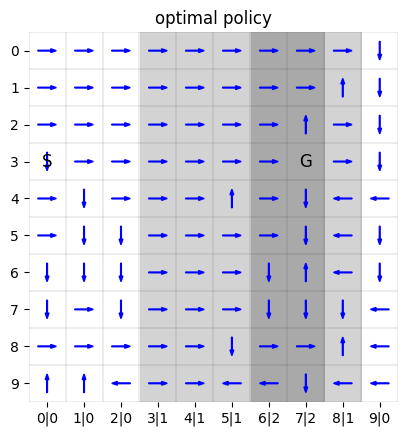

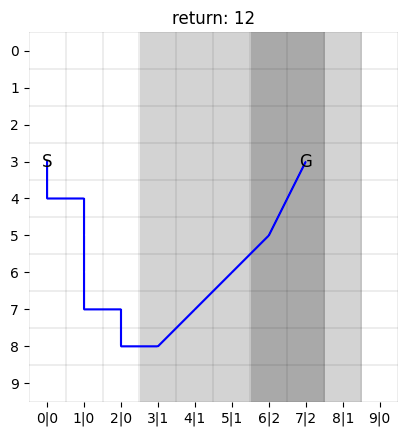

In [414]:
## 如果增加网格的空间， 可以借助风，迅速到达终点。
world = c6.windy_grid_world.WindyGridWorld(WORLD_HEIGHT=10, WORLD_WIDTH=10)
world.train(10000) 
print(f'average_step:{world.average_step()}')
world.show_optimal_policy()

trajectory = world.get_trajectory((3, 0))  ## 某些状态，可能会进入无限循环的情况下。
# print(f'trajectory={trajectory}')
world.show_trajectory(trajectory) 

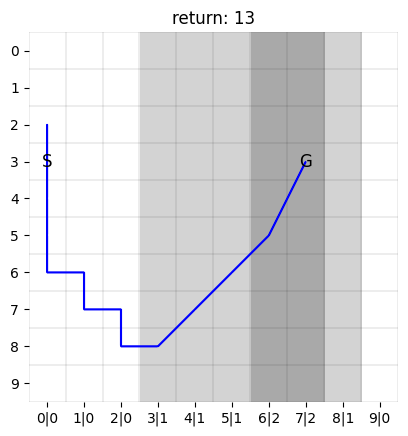

In [319]:
trajectory = world.get_trajectory((2, 0))
# print(f'trajectory={trajectory}')
world.show_trajectory(trajectory) 

### exercise 6.9

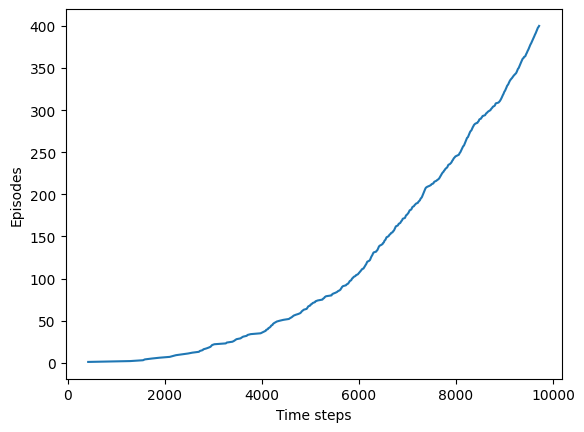

In [370]:
actions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
c6.windy_grid_world.WindyGridWorld(ACTIONS=actions).example_6_5(episodes=400) 

average_step:7.0


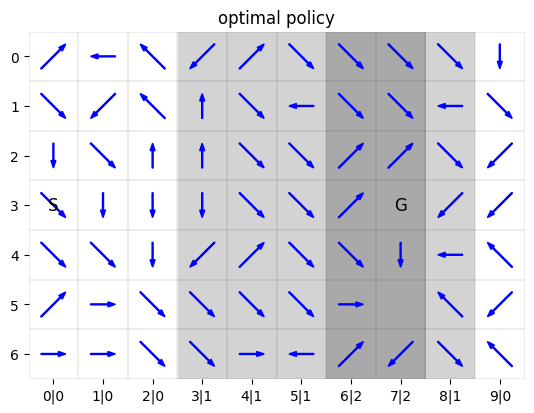

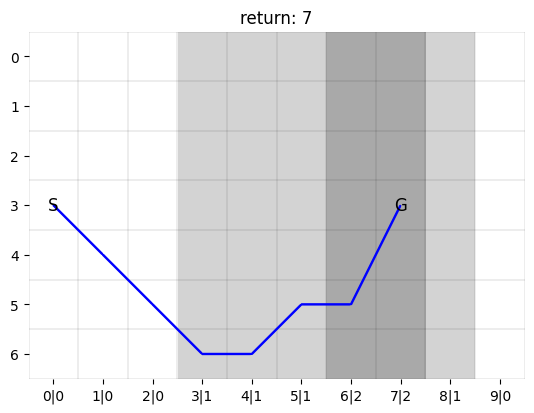

In [418]:
world = c6.windy_grid_world.WindyGridWorld(ACTIONS=actions)
steps = world.train(1000) 
print(f'average_step:{world.average_step()}')
world.show_optimal_policy()

trajectory = world.get_trajectory((3, 0))  ## 某些状态，可能会进入无限循环的情况下。
# print(f'trajectory={trajectory}')
world.show_trajectory(trajectory)  

In [324]:
world.q_value[(3,0)]

{(-1, 0): -10.433539430395266,
 (1, 0): -10.304241072088807,
 (0, -1): -11.001439350809108,
 (0, 1): -10.337769329745495,
 (-1, -1): -10.287704800219313,
 (-1, 1): -10.276387525389534,
 (1, -1): -10.350160901295464,
 (1, 1): -10.284732391266854}

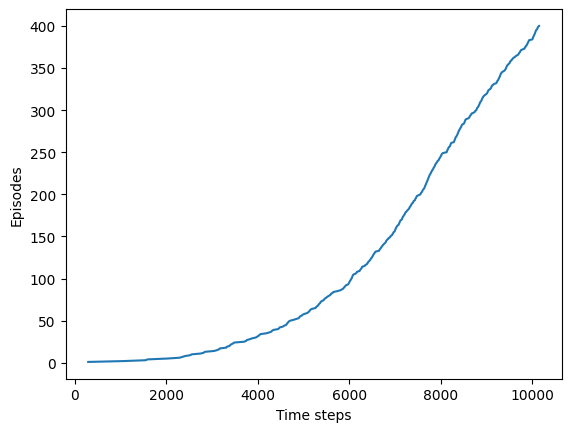

In [374]:
actions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1), (0,0)]
c6.windy_grid_world.WindyGridWorld(ACTIONS=actions).example_6_5(episodes=400) 

average_step:7.0


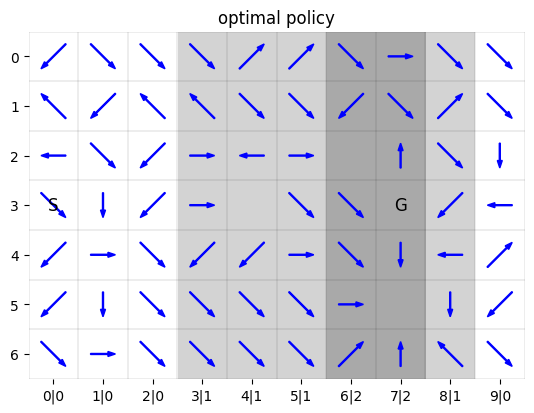

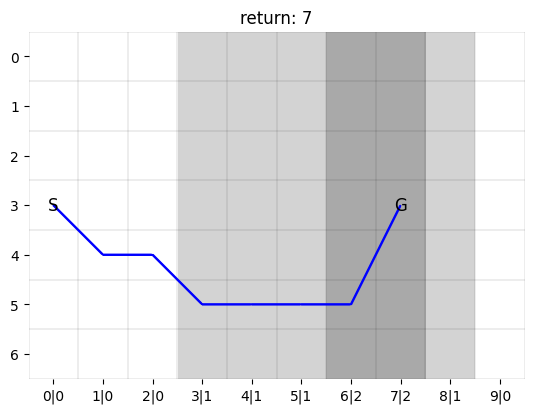

In [419]:

world = c6.windy_grid_world.WindyGridWorld(ACTIONS=actions)
steps = world.train(1000) 
print(f'average_step:{world.average_step()}')
world.show_optimal_policy()

trajectory = world.get_trajectory((3, 0))  ## 某些状态，可能会进入无限循环的情况下。
# print(f'trajectory={trajectory}')
world.show_trajectory(trajectory) 

there are some loop steps


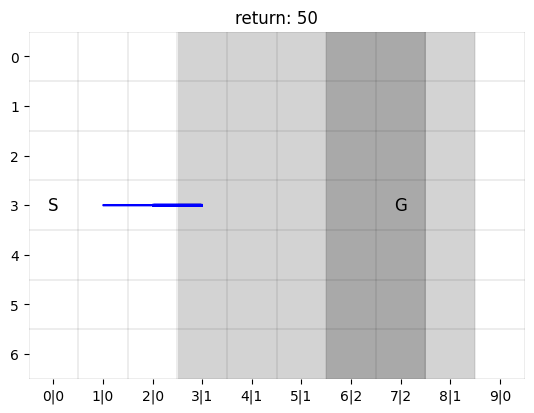

In [379]:
trajectory = world.get_trajectory((3, 1))  ## 某些状态，可能会进入无限循环的情况下。
# print(f'trajectory={trajectory}')
world.show_trajectory(trajectory) 

In [383]:
print(world.q_value[(5,7)])
print(world.q_value[(3,4)])
world.greedy_policy((5,7))

{(-1, 0): -2.328262150287628, (1, 0): -0.75, (0, -1): -3.7394481515449343, (0, 1): -1.0, (-1, -1): -4.144140922310116, (-1, 1): -1.884429931640625, (1, -1): -1.0, (1, 1): -0.984375, (0, 0): -0.75}
{(-1, 0): -7.424454130850245, (1, 0): -6.6889384628761945, (0, -1): -7.656852581196946, (0, 1): -7.152660761400224, (-1, -1): -7.090786216259865, (-1, 1): -7.704645496466663, (1, -1): -7.099784648712671, (1, 1): -6.925500304648715, (0, 0): -7.22036268822704}


(1, 0)

### exercise 6.10

In [356]:
actions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

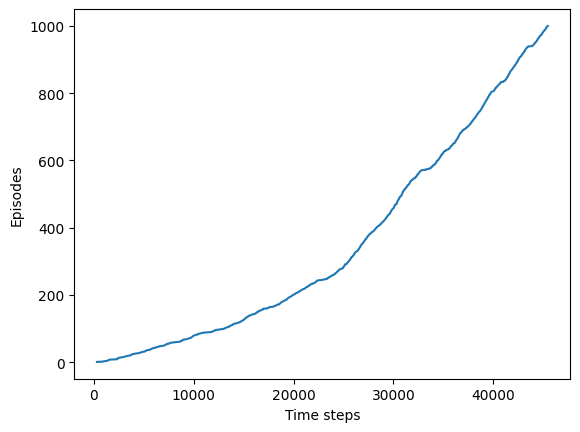

In [363]:
c6.windy_grid_world.WindyGridWorld(ACTIONS=actions, random_wind=True).example_6_5(episodes=1000) 

average_step:11.86


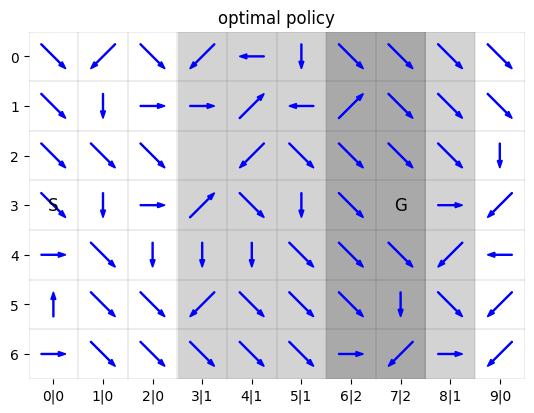

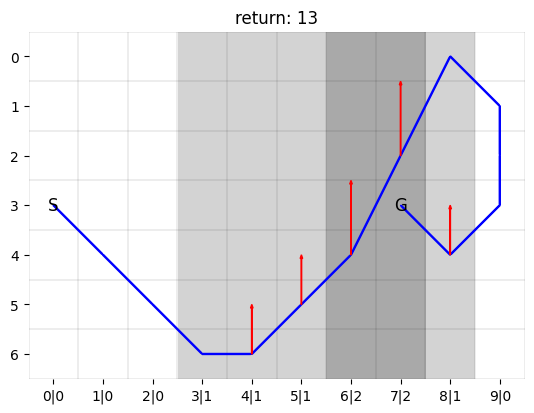

In [422]:
world = c6.windy_grid_world.WindyGridWorld(ACTIONS=actions, random_wind=True)
steps = world.train(1000) 
print(f'average_step:{world.average_step()}')
world.show_optimal_policy()

trajectory = world.get_trajectory((3, 0))  ## 某些状态，可能会进入无限循环的情况下。
# print(f'trajectory={trajectory}')
world.show_trajectory(trajectory, show_wind=True) 

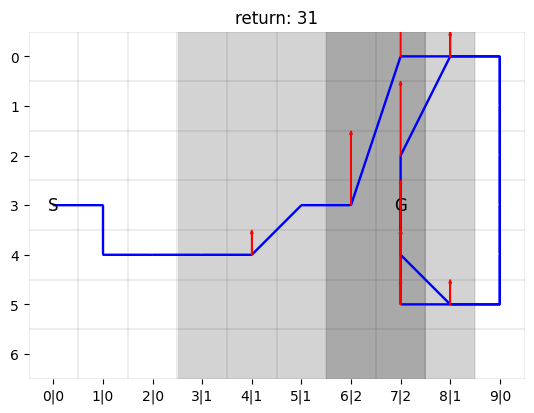

In [427]:
trajectory = world.get_trajectory((3, 0))  ## 某些状态，可能会进入无限循环的情况下。
# print(f'trajectory={trajectory}')
world.show_trajectory(trajectory, show_wind=True) 

### example 6.6

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:32<00:00,  1.52it/s]


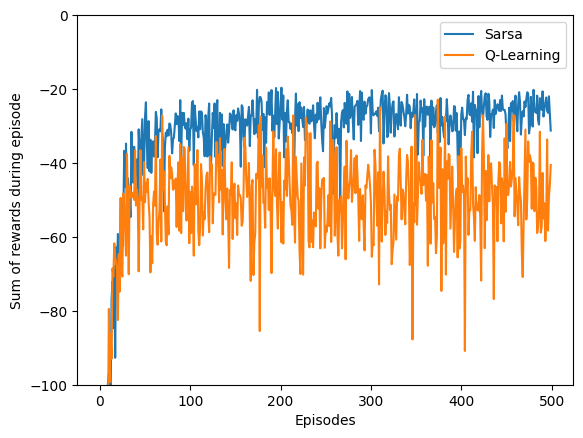

Sarsa Optimal Policy:
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['U', 'U', 'R', 'R', 'U', 'U', 'R', 'U', 'U', 'R', 'R', 'D']
['U', 'U', 'U', 'U', 'R', 'U', 'R', 'U', 'U', 'R', 'R', 'D']
['U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'G']
Q-Learning Optimal Policy:
['D', 'R', 'U', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D', 'D']
['D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'G']


In [430]:
c6.cliff_walking.example_6_6()

### figure 6_3

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.50s/it]


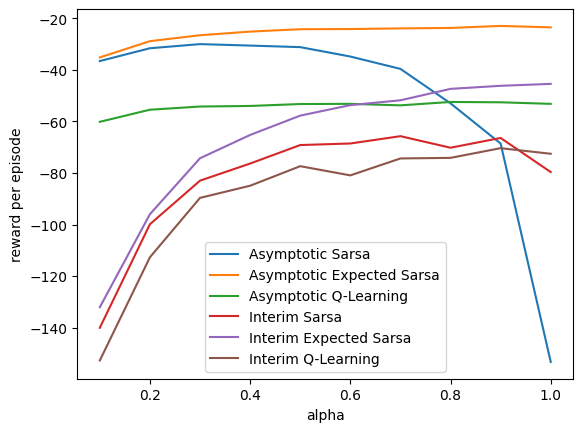

In [431]:
c6.cliff_walking.figure_6_3()

### example 6.7

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.86it/s]


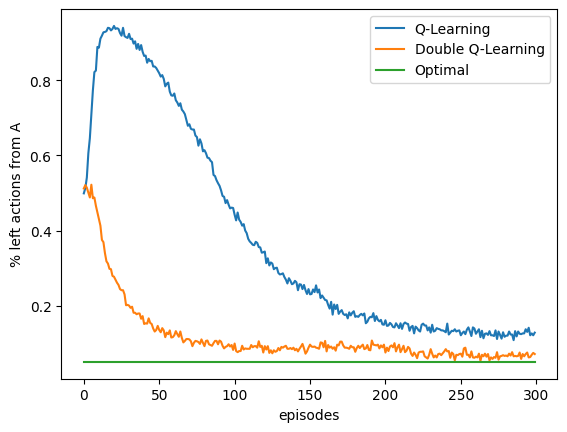

In [433]:
c6.maximization_bias.example_6_7()

## Chapter 7

### exercise_7.2

In [4]:
import matplotlib
matplotlib.use("TkAgg")

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

### figure 7.2

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:12<00:00,  2.52s/it]


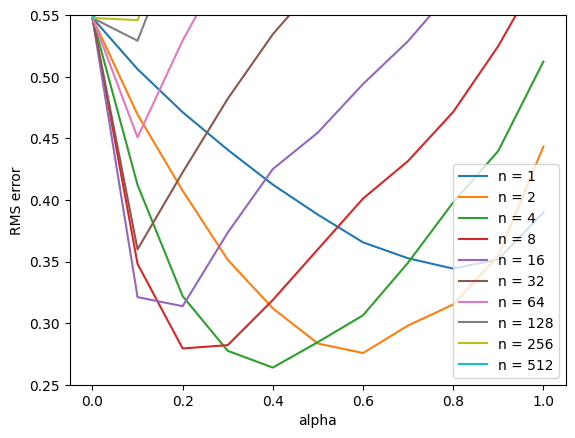

In [3]:
c7.random_walk.figure7_2() 

## Test

In [395]:
arr = np.array([1, 2, 3, 4, 5])
cumulative_sum = np.add.accumulate(arr)

print(cumulative_sum)

[ 1  3  6 10 15]


In [119]:
rent_nums, rent_probs, last_nums, last_probs = c4.car_rental.compute_rental_return_probs(3, 3, 3, constant_returned_cars=True)
print(rent_nums)
print(rent_probs)
print(last_nums)
print(last_probs, np.sum(last_probs))

TypeError: compute_rental_return_probs() missing 1 required positional argument: 'constant_rented_cars'

In [ ]:
rent_nums1, rent_probs1, last_nums1, last_probs1 = c4.car_rental.compute_rental_return_probs(3, 4, 2, constant_returned_cars=True)
print(rent_nums1)
print(rent_probs1)
print(last_nums1)
print(last_probs1, np.sum(last_probs1))
enumerate

In [ ]:
np.meshgrid(last_probs, last_probs1)

In [ ]:
np.sum(np.array([7.43625653e-03, 2.23087696e-02, 3.34631544e-02, 3.34631544e-02,
               2.50973658e-02, 1.50584195e-02, 7.52920974e-03, 3.22680417e-03,
               1.21005156e-03, 4.03350522e-04, 1.21005156e-04, 3.30014063e-05,
               8.25035158e-06, 1.90392729e-06, 4.07984419e-07, 8.15968837e-08,
               1.52994157e-08, 2.69989689e-09, 5.33451253e-10]) ) 

In [ ]:
[poisson.pmf(i, 3) * i for i in range(initial_cars + 1) +  (1 - poisson.cdf(initial_cars, 3))]

In [ ]:
sum(poisson.pmf(i, 3) * i for i in range(initial_cars + 1))

In [ ]:
a = [poisson.pmf(i, 3) for i in range(initial_cars)] + [1- poisson.cdf(initial_cars-1, 3) ] 
a

In [ ]:
np.sum(a)

In [ ]:
np.arrange(1, 10) 

In [ ]:
np.array([[1,2], [3,4]]).flatten()

In [ ]:
[(i,j) for i in range(3) for j in range(2)]  

In [ ]:
compute_rental_return_reward

In [3]:
%%ai
write a function to caculate 1+8/12+343

UsageError: Cell magic `%%ai` not found.
